
---
### **Introdução e Análise Exploratória de Dados**

O mercado de celulares é um dos ecossistemas tecnológicos mais dinâmicos e competitivos do mundo. Entender a relação entre as especificações técnicas de um aparelho, a estratégia de mercado de seu fabricante e seu valor final é um desafio complexo. Este projeto se propõe a desvendar essas relações através de um processo completo de Ciência de Dados, partindo de um dataset sobre especificações e preços de celulares.

A metodologia utilizada foi dividida em três fases fundamentais:

1.  **Análise Exploratória de Dados (EDA):** Uma investigação inicial para visualizar os dados, identificar padrões, formular hipóteses e, fundamentalmente, descobrir inconsistências e vieses presentes no dataset bruto.

2.  **Limpeza e Pré-processamento:** Uma etapa rigorosa de tratamento dos dados, onde os problemas identificados na EDA (como erros de formatação, dados não-representativos e inconsistências de nomenclatura) foram sistematicamente corrigidos para construir uma base de dados confiável.

3.  **Modelagem Preditiva Supervisionada:** A construção e avaliação de múltiplos modelos de Machine Learning para um problema de **Regressão**, com o objetivo de prever o preço de um aparelho.

O objetivo final deste projeto é, portanto, duplo: primeiro, extrair **insights estratégicos** sobre o mercado de celulares, e segundo, desenvolver e otimizar um **modelo de Machine Learning capaz de prever o preço de um aparelho com base em suas especificações técnicas**, validando a relação entre o valor percebido e as características de hardware.

---
### Features do Dataset:

* **Company Name:** Marca do celular.
* **Model Name:** Modelo específico.
* **RAM:** Memória RAM em GB.
* **Front Camera:** Resolução da câmera frontal em MP.
* **Back Camera:** Resolução da câmera traseira em MP.
* **Battery Capacity:** Capacidade da bateria em mAh.
* **Screen Size:** Tamanho da tela em polegadas.
* **Launched Price:** Preço de lançamento em diversas moedas.
* **Launched Year:** Ano de lançamento.

---4

In [ ]:
import pandas as pd
import zipfile
import os

# 1. Nome do arquivo ZIP
zip_filename = 'archive(1).zip'

# 2. Descompactar o arquivo
with zipfile.ZipFile(zip_filename, 'r') as zip_ref:
    zip_ref.extractall('pasta_do_dataset')

# 3. Listar os arquivos para ver o nome do CSV
print(os.listdir('pasta_do_dataset'))

# 4. Ler o arquivo CSV a partir da pasta descompactada
csv_filename = 'pasta_do_dataset/Mobiles Dataset (2025).csv'
df = pd.read_csv(csv_filename, encoding='latin-1')

print(df.head())

['Mobiles Dataset (2025).csv']
  Company Name            Model Name Mobile Weight  RAM Front Camera  \
0        Apple       iPhone 16 128GB          174g  6GB         12MP   
1        Apple       iPhone 16 256GB          174g  6GB         12MP   
2        Apple       iPhone 16 512GB          174g  6GB         12MP   
3        Apple  iPhone 16 Plus 128GB          203g  6GB         12MP   
4        Apple  iPhone 16 Plus 256GB          203g  6GB         12MP   

  Back Camera   Processor Battery Capacity Screen Size  \
0        48MP  A17 Bionic         3,600mAh  6.1 inches   
1        48MP  A17 Bionic         3,600mAh  6.1 inches   
2        48MP  A17 Bionic         3,600mAh  6.1 inches   
3        48MP  A17 Bionic         4,200mAh  6.7 inches   
4        48MP  A17 Bionic         4,200mAh  6.7 inches   

  Launched Price (Pakistan) Launched Price (India) Launched Price (China)  \
0               PKR 224,999             INR 79,999              CNY 5,799   
1               PKR 234,999      

In [ ]:
colunas_para_remover = ["Launched Price (Pakistan)", "Launched Price (India)", "Launched Price (China)", "Launched Price (Dubai)"]
df = df.drop(colunas_para_remover, axis=1, errors='ignore')
print(df.head())

  Company Name            Model Name Mobile Weight  RAM Front Camera  \
0        Apple       iPhone 16 128GB          174g  6GB         12MP   
1        Apple       iPhone 16 256GB          174g  6GB         12MP   
2        Apple       iPhone 16 512GB          174g  6GB         12MP   
3        Apple  iPhone 16 Plus 128GB          203g  6GB         12MP   
4        Apple  iPhone 16 Plus 256GB          203g  6GB         12MP   

  Back Camera   Processor Battery Capacity Screen Size Launched Price (USA)  \
0        48MP  A17 Bionic         3,600mAh  6.1 inches              USD 799   
1        48MP  A17 Bionic         3,600mAh  6.1 inches              USD 849   
2        48MP  A17 Bionic         3,600mAh  6.1 inches              USD 899   
3        48MP  A17 Bionic         4,200mAh  6.7 inches              USD 899   
4        48MP  A17 Bionic         4,200mAh  6.7 inches              USD 949   

   Launched Year  
0           2024  
1           2024  
2           2024  
3           2024

In [ ]:
# Verificar valores ausentes em cada coluna
df.isnull().sum()

,0
Company Name,0
Model Name,0
Mobile Weight,0
RAM,0
Front Camera,0
Back Camera,0
Processor,0
Battery Capacity,0
Screen Size,0
Launched Price (USA),0


In [ ]:
# Verificar tipos de dados de cada coluna
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 930 entries, 0 to 929
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Company Name          930 non-null    object
 1   Model Name            930 non-null    object
 2   Mobile Weight         930 non-null    object
 3   RAM                   930 non-null    object
 4   Front Camera          930 non-null    object
 5   Back Camera           930 non-null    object
 6   Processor             930 non-null    object
 7   Battery Capacity      930 non-null    object
 8   Screen Size           930 non-null    object
 9   Launched Price (USA)  930 non-null    object
 10  Launched Year         930 non-null    int64 
dtypes: int64(1), object(10)
memory usage: 80.1+ KB


In [ ]:
# Verificar linhas duplicadas, mantendo todas as instâncias se duplicatas forem encontradas
df[df.duplicated(keep=False)]

,Company Name,Model Name,Mobile Weight,RAM,Front Camera,Back Camera,Processor,Battery Capacity,Screen Size,Launched Price (USA),Launched Year
344,Oppo,A3 128GB,186g,4GB,5MP,50MP,Snapdragon 6s 4G Gen 1,5000mAh,6.7 inches,USD 399,2024
347,Oppo,A3 128GB,186g,4GB,5MP,50MP,Snapdragon 6s 4G Gen 1,5000mAh,6.7 inches,USD 399,2024
423,Oppo,K11x 128GB,195g,8GB,16MP,108MP + 2MP,Qualcomm Snapdragon 695,"5,000mAh",6.72 inches,USD 199,2023
424,Oppo,K11x 256GB,195g,12GB,16MP,108MP + 2MP,Qualcomm Snapdragon 695,"5,000mAh",6.72 inches,USD 229,2023
425,Oppo,K10x 128GB,195g,6GB,16MP,64MP + 2MP + 2MP,Qualcomm Snapdragon 695,"5,000mAh",6.59 inches,USD 199,2022
426,Oppo,K10x 256GB,195g,8GB,16MP,64MP + 2MP + 2MP,Qualcomm Snapdragon 695,"5,000mAh",6.59 inches,USD 229,2022
427,Oppo,K10 5G 128GB,205g,8GB,16MP,64MP + 8MP + 2MP,MediaTek Dimensity 8000-Max,"5,000mAh",6.59 inches,USD 249,2022
428,Oppo,K9x 128GB,194g,6GB,16MP,64MP + 2MP + 2MP,MediaTek Dimensity 810,"5,000mAh",6.5 inches,USD 199,2021
429,Oppo,K9x 256GB,194g,8GB,16MP,64MP + 2MP + 2MP,MediaTek Dimensity 810,"5,000mAh",6.5 inches,USD 229,2021
430,Oppo,K9 Pro 5G 128GB,180g,8GB,16MP,64MP + 8MP + 2MP,MediaTek Dimensity 1200,"4,500mAh",6.43 inches,USD 299,2021


In [ ]:
# Contar o número de duplicatas antes de remover
print(f"Número de duplicatas antes: {df.duplicated().sum()}")

# Remover as duplicatas
df.drop_duplicates(inplace=True)

# Contar o número de duplicatas depois de remover para verificar
print(f"Número de duplicatas depois: {df.duplicated().sum()}")

Número de duplicatas antes: 15
Número de duplicatas depois: 0


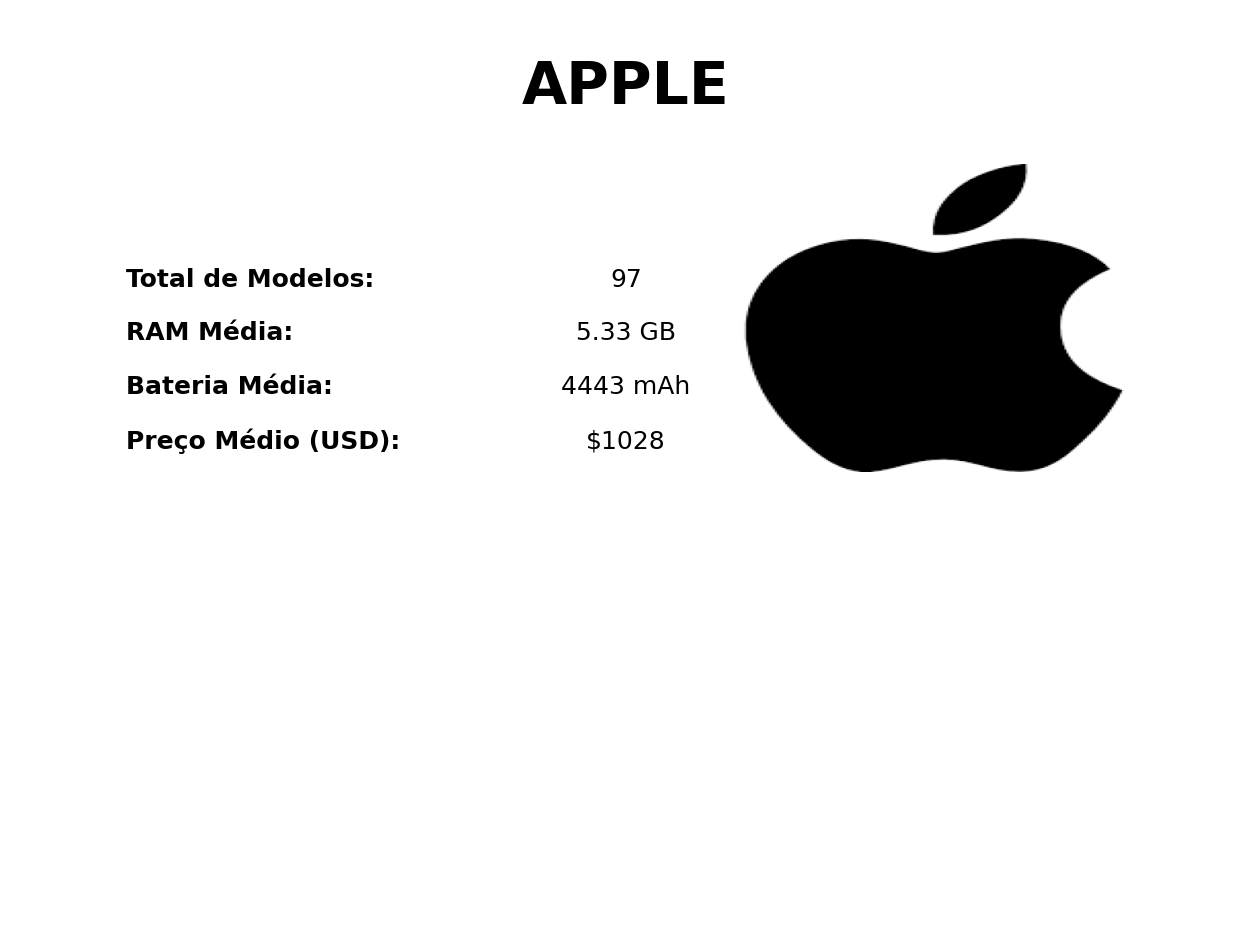

In [ ]:
# @title
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import requests
from io import BytesIO
import os

# df = pd.read_csv(...)
# df['RAM'] = df['RAM'].str.extract(r'(\d+)').astype(float)
# etc.

def get_brand_data(df, brand_name):
    """
    Filtra o DataFrame por marca e calcula as estatísticas para a marca específica.
    """
    brand_data = df[df['Company Name'] == brand_name].copy() # Crie uma cópia para evitar configuração com aviso de cópia

    # Limpa e converte colunas em numéricas
    brand_data['RAM'] = brand_data['RAM'].str.extract(r'(\d+)').astype(float)
    brand_data['Battery Capacity'] = brand_data['Battery Capacity'].str.replace(',', '').str.extract(r'(\d+)').astype(float)
    brand_data['Screen Size'] = brand_data['Screen Size'].str.extract(r'(\d+\.?\d*)').astype(float)

    stats = {
        'total_models': brand_data['Model Name'].nunique(),
        'avg_ram': brand_data['RAM'].mean(),
        'avg_battery': brand_data['Battery Capacity'].mean(),
        'avg_price': brand_data['Launched Price (USA)'].str.replace('USD', '').str.replace(',', '').astype(float).mean(),
    }

    return stats

def create_apple_card(df, file_path):
    """
    Cria e exibe o card visual para a marca Apple usando uma imagem local.
    """
    fig, ax = plt.subplots(figsize=(16, 12))
    fig.patch.set_facecolor('white')
    ax.set_facecolor('white')
    ax.set_xlim(0, 16)
    ax.set_ylim(0, 12)
    ax.axis('off')

    apple_stats = get_brand_data(df, 'Apple')

    ax.text(8, 11, 'APPLE', ha='center', va='center', fontsize=42, fontweight='bold', color='black')

    try:
        if os.path.exists(file_path):
            apple_img = Image.open(file_path)
            ax.imshow(apple_img, extent=[9, 15, 6, 10], alpha=1.0, zorder=10)
        else:
            ax.add_patch(plt.Rectangle((5, 4), 6, 4, facecolor='lightgray', alpha=0.5))
            ax.text(8, 6, 'APPLE\nLOGO', ha='center', va='center', fontsize=24, fontweight='bold')
    except Exception as e:
        print(f"Erro ao carregar a imagem: {e}")
        ax.add_patch(plt.Rectangle((5, 4), 6, 4, facecolor='lightgray', alpha=0.5))
        ax.text(8, 6, 'APPLE\nLOGO', ha='center', va='center', fontsize=24, fontweight='bold')


    # Exibe as estatísticas
    ax.text(1.5, 8.5, f"Total de Modelos:", ha='left', va='center', fontsize=18, fontweight='bold')
    ax.text(1.5, 7.8, f"RAM Média:", ha='left', va='center', fontsize=18, fontweight='bold')
    ax.text(1.5, 7.1, f"Bateria Média:", ha='left', va='center', fontsize=18, fontweight='bold')
    ax.text(1.5, 6.4, f"Preço Médio (USD):", ha='left', va='center', fontsize=18, fontweight='bold')

    ax.text(8, 8.5, f"{apple_stats['total_models']}", ha='center', va='center', fontsize=18)
    ax.text(8, 7.8, f"{apple_stats['avg_ram']:.2f} GB", ha='center', va='center', fontsize=18)
    ax.text(8, 7.1, f"{apple_stats['avg_battery']:.0f} mAh", ha='center', va='center', fontsize=18)
    ax.text(8, 6.4, f"${apple_stats['avg_price']:.0f}", ha='center', va='center', fontsize=18)

    plt.show()

# --- CHAME A FUNÇÃO PARA GERAR O CARD ---
create_apple_card(df, 'apple_logo.png')

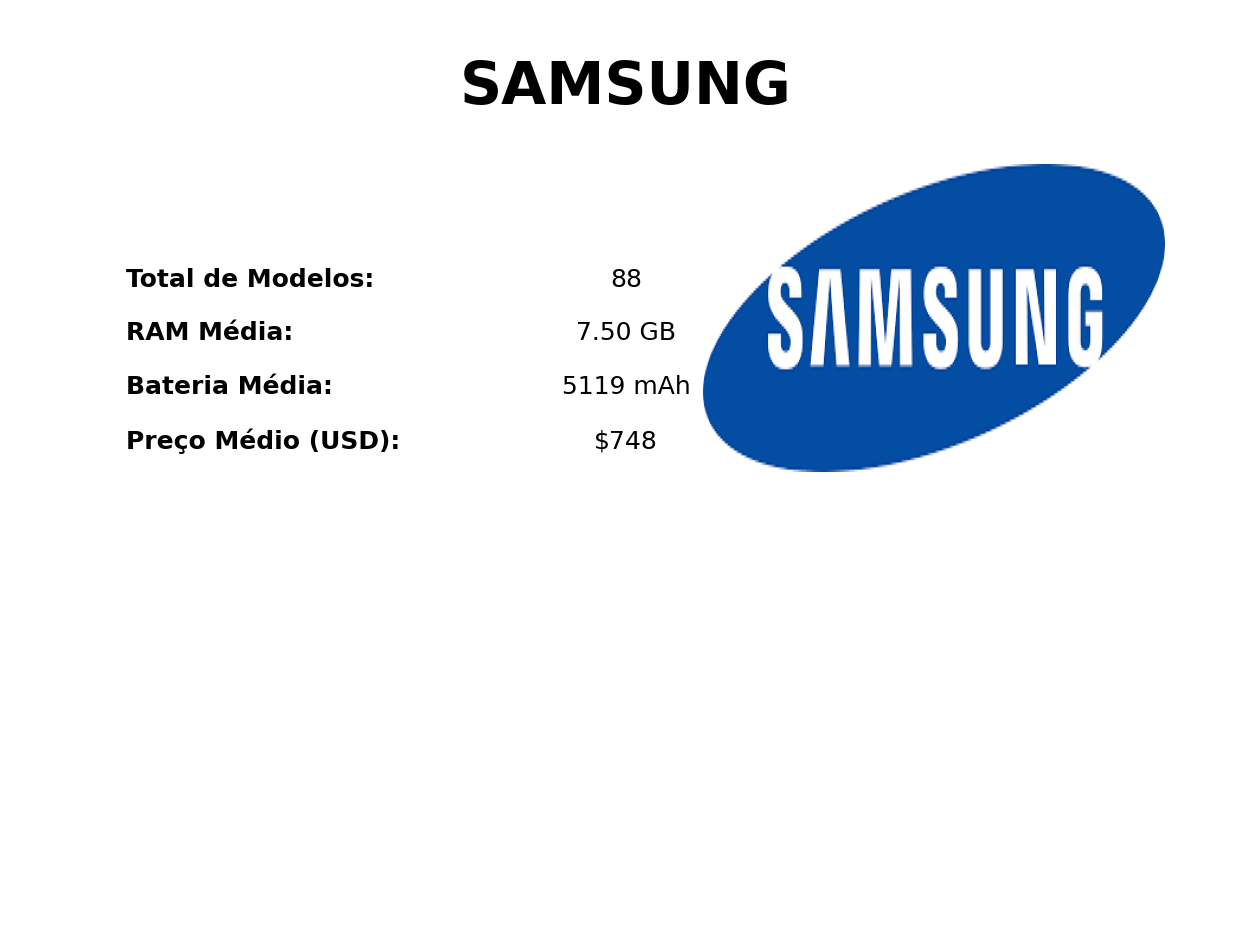

In [ ]:
# @title
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import requests
from io import BytesIO
import os



def create_samsung_card(df, file_path):
    """
    Cria e exibe o card visual para a marca Samsung usando uma imagem local.
    """
    fig, ax = plt.subplots(figsize=(16, 12))
    fig.patch.set_facecolor('white')
    ax.set_facecolor('white')
    ax.set_xlim(0, 16)
    ax.set_ylim(0, 12)
    ax.axis('off')

    samsung_stats = get_brand_data(df, 'Samsung')

    ax.text(8, 11, 'SAMSUNG', ha='center', va='center', fontsize=42, fontweight='bold', color='black')

    try:
        if os.path.exists(file_path):
            samsung_img = Image.open(file_path)
            ax.imshow(samsung_img, extent=[9, 15, 6, 10], alpha=1.0, zorder=10)
        else:
            ax.add_patch(plt.Rectangle((5, 4), 6, 4, facecolor='lightgray', alpha=0.5))
            ax.text(8, 6, 'SAMSUNG\nLOGO', ha='center', va='center', fontsize=24, fontweight='bold')
    except Exception as e:
        print(f"Erro ao carregar a imagem: {e}")
        ax.add_patch(plt.Rectangle((5, 4), 6, 4, facecolor='lightgray', alpha=0.5))
        ax.text(8, 6, 'SAMSUNG\nLOGO', ha='center', va='center', fontsize=24, fontweight='bold')

    # Exibe as estatísticas
    ax.text(1.5, 8.5, f"Total de Modelos:", ha='left', va='center', fontsize=18, fontweight='bold')
    ax.text(1.5, 7.8, f"RAM Média:", ha='left', va='center', fontsize=18, fontweight='bold')
    ax.text(1.5, 7.1, f"Bateria Média:", ha='left', va='center', fontsize=18, fontweight='bold')
    ax.text(1.5, 6.4, f"Preço Médio (USD):", ha='left', va='center', fontsize=18, fontweight='bold')

    ax.text(8, 8.5, f"{int(samsung_stats['total_models'])}", ha='center', va='center', fontsize=18)
    ax.text(8, 7.8, f"{samsung_stats['avg_ram']:.2f} GB", ha='center', va='center', fontsize=18)
    ax.text(8, 7.1, f"{samsung_stats['avg_battery']:.0f} mAh", ha='center', va='center', fontsize=18)
    ax.text(8, 6.4, f"${samsung_stats['avg_price']:.0f}", ha='center', va='center', fontsize=18)

    plt.show()


create_samsung_card(df, 'samsung_logo.png')

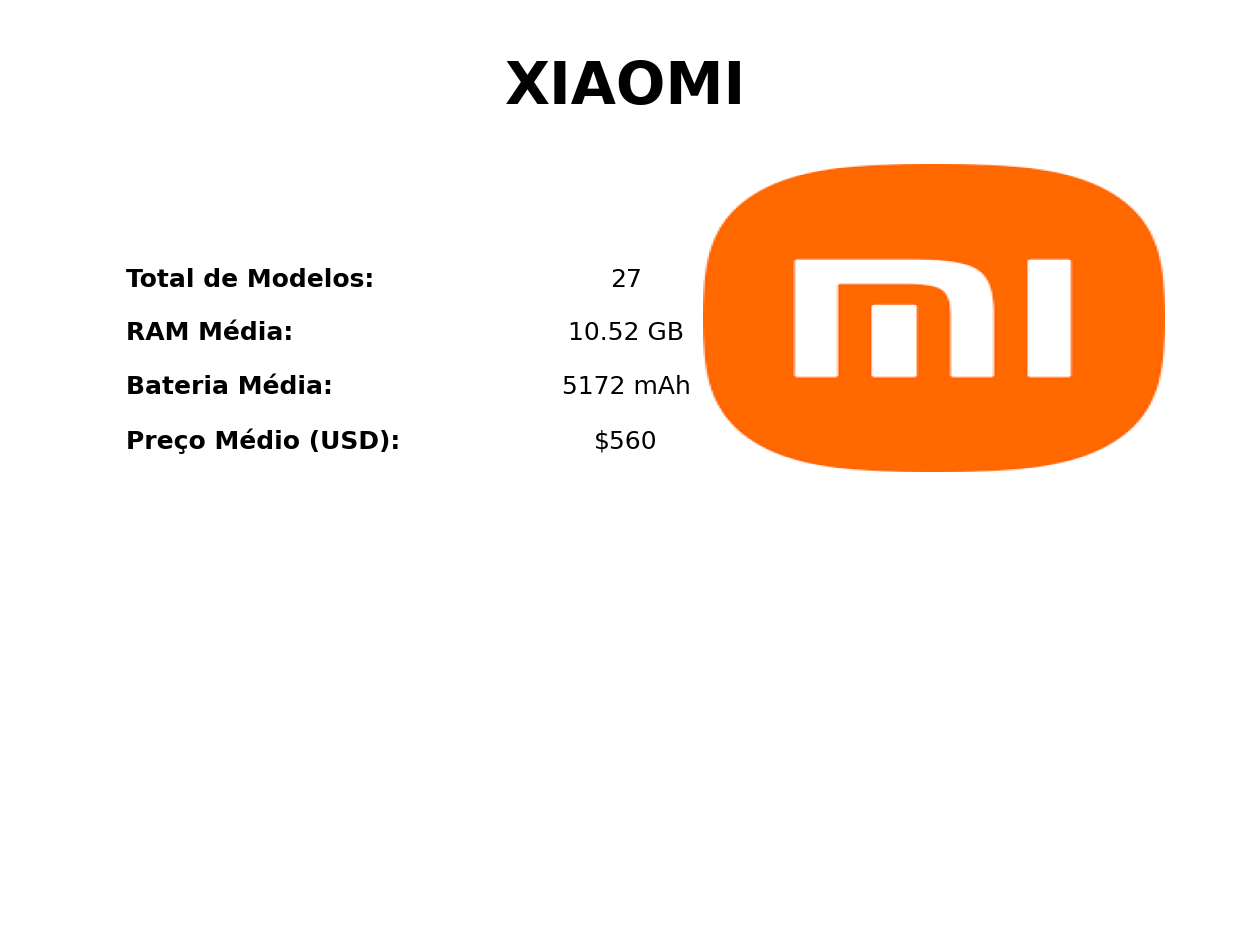

In [ ]:
# @title
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import requests
from io import BytesIO
import os


def create_xiaomi_card(df, file_path):
    """
    Cria e exibe o card visual para a marca Xiaomi usando uma imagem local.
    """
    fig, ax = plt.subplots(figsize=(16, 12))
    fig.patch.set_facecolor('white')
    ax.set_facecolor('white')
    ax.set_xlim(0, 16)
    ax.set_ylim(0, 12)
    ax.axis('off')

    xiaomi_stats = get_brand_data(df, 'Xiaomi')

    ax.text(8, 11, 'XIAOMI', ha='center', va='center', fontsize=42, fontweight='bold', color='black')

    try:
        if os.path.exists(file_path):
            xiaomi_img = Image.open(file_path)
            ax.imshow(xiaomi_img, extent=[9, 15, 6, 10], alpha=1.0, zorder=10)
        else:
            ax.add_patch(plt.Rectangle((5, 4), 6, 4, facecolor='lightgray', alpha=0.5))
            ax.text(8, 6, 'XIAOMI\nLOGO', ha='center', va='center', fontsize=24, fontweight='bold')
    except Exception as e:
        print(f"Erro ao carregar a imagem: {e}")
        ax.add_patch(plt.Rectangle((5, 4), 6, 4, facecolor='lightgray', alpha=0.5))
        ax.text(8, 6, 'XIAOMI\nLOGO', ha='center', va='center', fontsize=24, fontweight='bold')

    # Exibe as estatísticas
    ax.text(1.5, 8.5, f"Total de Modelos:", ha='left', va='center', fontsize=18, fontweight='bold')
    ax.text(1.5, 7.8, f"RAM Média:", ha='left', va='center', fontsize=18, fontweight='bold')
    ax.text(1.5, 7.1, f"Bateria Média:", ha='left', va='center', fontsize=18, fontweight='bold')
    ax.text(1.5, 6.4, f"Preço Médio (USD):", ha='left', va='center', fontsize=18, fontweight='bold')

    ax.text(8, 8.5, f"{int(xiaomi_stats['total_models'])}", ha='center', va='center', fontsize=18)
    ax.text(8, 7.8, f"{xiaomi_stats['avg_ram']:.2f} GB", ha='center', va='center', fontsize=18)
    ax.text(8, 7.1, f"{xiaomi_stats['avg_battery']:.0f} mAh", ha='center', va='center', fontsize=18)
    ax.text(8, 6.4, f"${xiaomi_stats['avg_price']:.0f}", ha='center', va='center', fontsize=18)

    plt.show()

# --- CHAMA A FUNÇÃO PARA GERAR O CARD ---
create_xiaomi_card(df, 'xiaomi_logo.png')

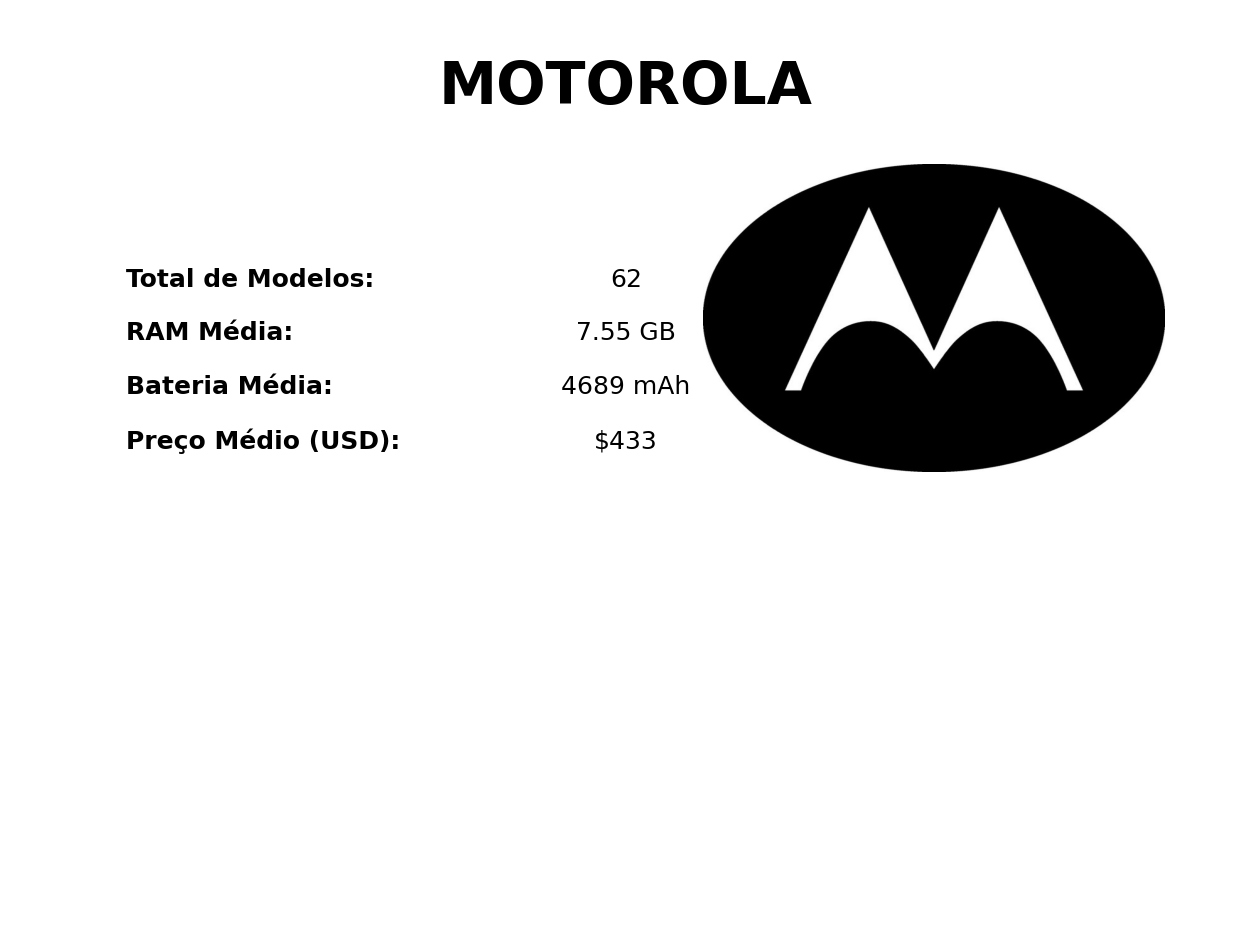

In [ ]:
# @title
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import requests
from io import BytesIO
import os


def create_motorola_card(df, file_path):
    """
    Cria e exibe o card visual para a marca Motorola usando uma imagem local.
    """
    fig, ax = plt.subplots(figsize=(16, 12))
    fig.patch.set_facecolor('white')
    ax.set_facecolor('white')
    ax.set_xlim(0, 16)
    ax.set_ylim(0, 12)
    ax.axis('off')

    motorola_stats = get_brand_data(df, 'Motorola')

    ax.text(8, 11, 'MOTOROLA', ha='center', va='center', fontsize=42, fontweight='bold', color='black')

    try:
        if os.path.exists(file_path):
            motorola_img = Image.open(file_path)
            ax.imshow(motorola_img, extent=[9, 15, 6, 10], alpha=1.0, zorder=10)
        else:
            ax.add_patch(plt.Rectangle((5, 4), 6, 4, facecolor='lightgray', alpha=0.5))
            ax.text(8, 6, 'MOTOROLA\nLOGO', ha='center', va='center', fontsize=24, fontweight='bold')
    except Exception as e:
        print(f"Erro ao carregar a imagem: {e}")
        ax.add_patch(plt.Rectangle((5, 4), 6, 4, facecolor='lightgray', alpha=0.5))
        ax.text(8, 6, 'MOTOROLA\nLOGO', ha='center', va='center', fontsize=24, fontweight='bold')

    # Exibe as estatísticas
    ax.text(1.5, 8.5, f"Total de Modelos:", ha='left', va='center', fontsize=18, fontweight='bold')
    ax.text(1.5, 7.8, f"RAM Média:", ha='left', va='center', fontsize=18, fontweight='bold')
    ax.text(1.5, 7.1, f"Bateria Média:", ha='left', va='center', fontsize=18, fontweight='bold')
    ax.text(1.5, 6.4, f"Preço Médio (USD):", ha='left', va='center', fontsize=18, fontweight='bold')

    ax.text(8, 8.5, f"{int(motorola_stats['total_models'])}", ha='center', va='center', fontsize=18)
    ax.text(8, 7.8, f"{motorola_stats['avg_ram']:.2f} GB", ha='center', va='center', fontsize=18)
    ax.text(8, 7.1, f"{motorola_stats['avg_battery']:.0f} mAh", ha='center', va='center', fontsize=18)
    ax.text(8, 6.4, f"${motorola_stats['avg_price']:.0f}", ha='center', va='center', fontsize=18)

    plt.show()


create_motorola_card(df, 'motorola_logo.png')

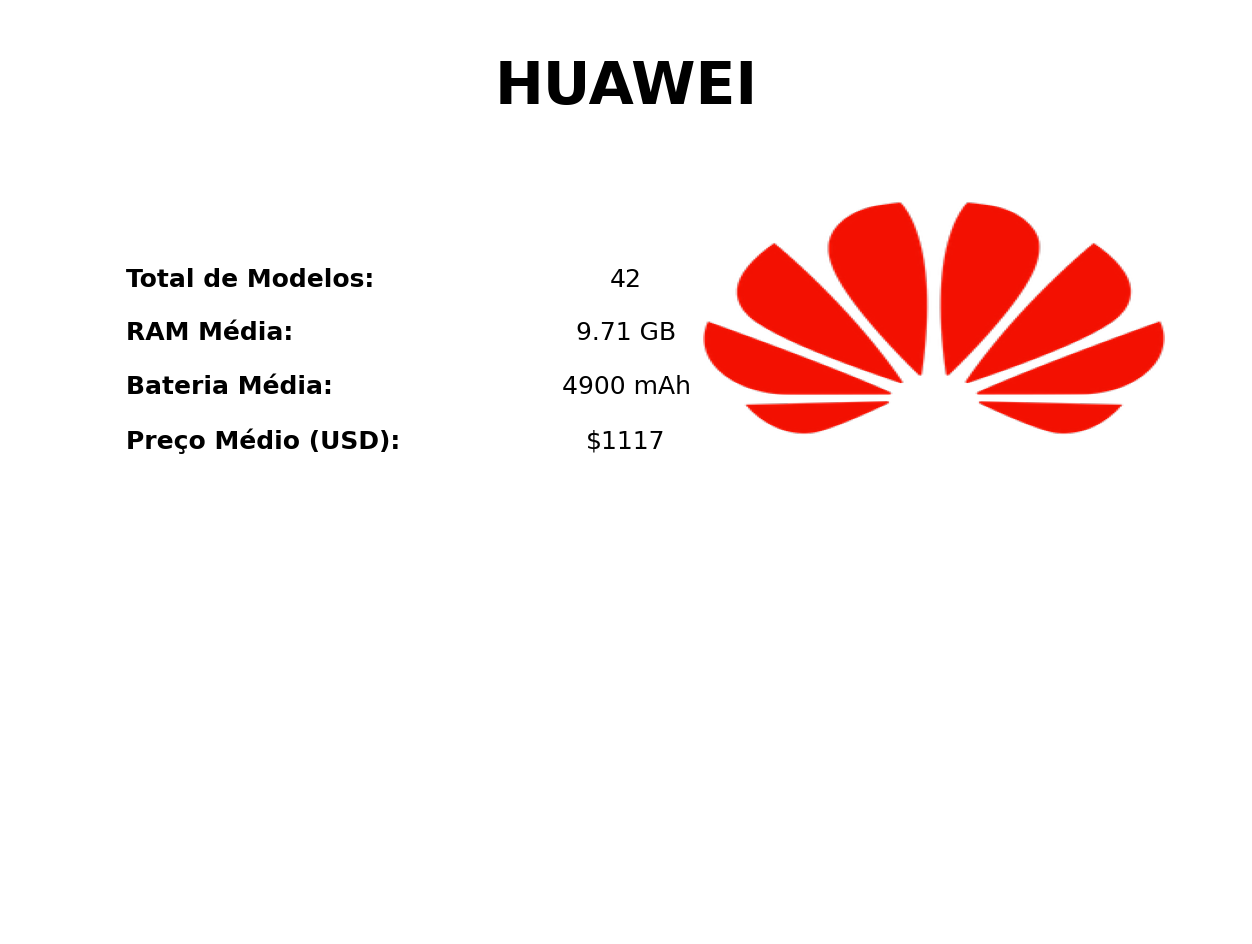

In [ ]:
# @title
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import requests
from io import BytesIO
import os



def create_huawei_card(df, file_path):
    """
    Cria e exibe o card visual para a marca Huawei usando uma imagem local.
    """
    fig, ax = plt.subplots(figsize=(16, 12))
    fig.patch.set_facecolor('white')
    ax.set_facecolor('white')
    ax.set_xlim(0, 16)
    ax.set_ylim(0, 12)
    ax.axis('off')

    huawei_stats = get_brand_data(df, 'Huawei')

    ax.text(8, 11, 'HUAWEI', ha='center', va='center', fontsize=42, fontweight='bold', color='black')

    try:
        if os.path.exists(file_path):
            huawei_img = Image.open(file_path)
            ax.imshow(huawei_img, extent=[9, 15, 6, 10], alpha=1.0, zorder=10)
        else:
            ax.add_patch(plt.Rectangle((5, 4), 6, 4, facecolor='lightgray', alpha=0.5))
            ax.text(8, 6, 'HUAWEI\nLOGO', ha='center', va='center', fontsize=24, fontweight='bold')
    except Exception as e:
        print(f"Erro ao carregar a imagem: {e}")
        ax.add_patch(plt.Rectangle((5, 4), 6, 4, facecolor='lightgray', alpha=0.5))
        ax.text(8, 6, 'HUAWEI\nLOGO', ha='center', va='center', fontsize=24, fontweight='bold')

    # Exibe as estatísticas
    ax.text(1.5, 8.5, f"Total de Modelos:", ha='left', va='center', fontsize=18, fontweight='bold')
    ax.text(1.5, 7.8, f"RAM Média:", ha='left', va='center', fontsize=18, fontweight='bold')
    ax.text(1.5, 7.1, f"Bateria Média:", ha='left', va='center', fontsize=18, fontweight='bold')
    ax.text(1.5, 6.4, f"Preço Médio (USD):", ha='left', va='center', fontsize=18, fontweight='bold')

    ax.text(8, 8.5, f"{int(huawei_stats['total_models'])}", ha='center', va='center', fontsize=18)
    ax.text(8, 7.8, f"{huawei_stats['avg_ram']:.2f} GB", ha='center', va='center', fontsize=18)
    ax.text(8, 7.1, f"{huawei_stats['avg_battery']:.0f} mAh", ha='center', va='center', fontsize=18)
    ax.text(8, 6.4, f"${huawei_stats['avg_price']:.0f}", ha='center', va='center', fontsize=18)

    plt.show()


create_huawei_card(df, 'huawei_logo.png')

In [ ]:
# Exibe as primeiras linhas do DataFrame para visualização inicial
df.head()

,Company Name,Model Name,Mobile Weight,RAM,Front Camera,Back Camera,Processor,Battery Capacity,Screen Size,Launched Price (USA),Launched Year
0,Apple,iPhone 16 128GB,174g,6GB,12MP,48MP,A17 Bionic,"3,600mAh",6.1 inches,USD 799,2024
1,Apple,iPhone 16 256GB,174g,6GB,12MP,48MP,A17 Bionic,"3,600mAh",6.1 inches,USD 849,2024
2,Apple,iPhone 16 512GB,174g,6GB,12MP,48MP,A17 Bionic,"3,600mAh",6.1 inches,USD 899,2024
3,Apple,iPhone 16 Plus 128GB,203g,6GB,12MP,48MP,A17 Bionic,"4,200mAh",6.7 inches,USD 899,2024
4,Apple,iPhone 16 Plus 256GB,203g,6GB,12MP,48MP,A17 Bionic,"4,200mAh",6.7 inches,USD 949,2024


In [ ]:
# Exibe estatísticas descritivas do DataFrame (apenas colunas numéricas)
df.describe()

,Launched Year
count,915.000000
mean,2022.205464
std,1.869182
min,2014.000000
25%,2021.000000
50%,2023.000000
75%,2024.000000
max,2025.000000


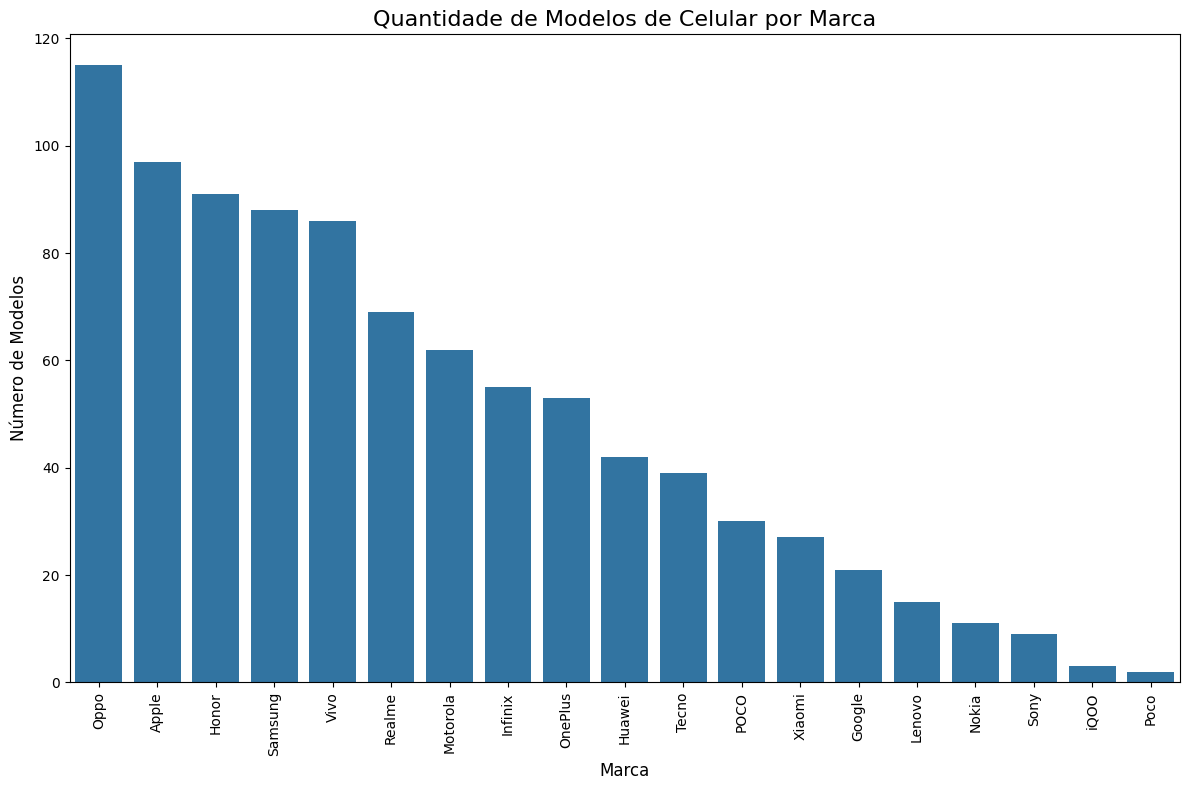

In [ ]:
# Importando as bibliotecas para o gráfico
import matplotlib.pyplot as plt
import seaborn as sns



# 1. Contar quantos modelos cada marca possui
# Usamos value_counts() para contar as ocorrências de cada 'Company Name'
company_counts = df['Company Name'].value_counts()

# 2. Configurar o tamanho da figura do gráfico
plt.figure(figsize=(12, 8))

# 3. Criar o gráfico de barras com Seaborn
#   - x=company_counts.index: No eixo X, colocamos os nomes das marcas.
#   - y=company_counts.values: No eixo Y, colocamos a contagem de modelos.
sns.barplot(x=company_counts.index, y=company_counts.values)

# 4. Adicionar Título e Nomes para os Eixos
plt.title('Quantidade de Modelos de Celular por Marca', fontsize=16)
plt.xlabel('Marca', fontsize=12)
plt.ylabel('Número de Modelos', fontsize=12)

# 5. Girar os nomes das marcas no eixo X para não ficarem sobrepostos
plt.xticks(rotation=90)

# 6. Ajustar o layout para garantir que tudo apareça corretamente
plt.tight_layout()

# 7. COMANDO PARA MOSTRAR O GRÁFICO NA TELA
plt.show()


*
   Nota Importante sobre a Contagem: A contagem de modelos apresentada neste gráfico reflete o número total de linhas por marca no dataset bruto. Como será detalhado na seção sobre Qualidade dos Dados, este método infla a contagem de marcas como a Apple, que registram cada variação de armazenamento (128GB, 256GB) como um item separado. Para uma comparação mais precisa da diversidade de portfólio, foi gerado um segundo gráfico baseado nos "Modelos Base Únicos".

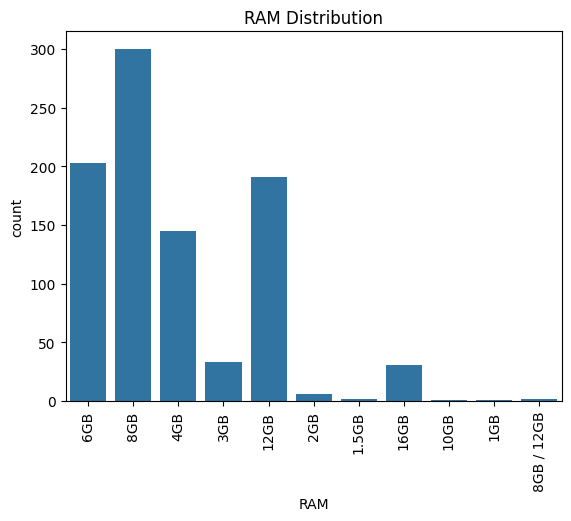

In [ ]:
sns.countplot(x=df["RAM"])
plt.title("RAM Distribution")
plt.xticks(rotation=90)
plt.show()

Análise do Gráfico: Distribuição da Memória RAM

Este gráfico de contagem ilustra a distribuição da memória RAM (em GB) entre todos os modelos de celulares presentes no dataset. Ele nos ajuda a entender quais são as especificações mais comuns e como o mercado se segmenta em termos de performance.

Principais Observações (Insights)

📊 Concentração no Padrão de Mercado Atual

  Principal Achado: A grande maioria dos modelos se concentra nas faixas de 4GB, 6GB, 8GB e 12GB, confirmando estes como os padrões atuais para os segmentos de entrada, intermediário e topo de linha, respectivamente.

   Implicação: A faixa de 8GB parece ser o "ponto ideal" (sweet spot) do mercado, oferecendo um bom equilíbrio entre performance e custo para a maioria dos consumidores.

📈 Presença de Modelos de Alta Performance (Premium/Gamer)

   Observação: Há uma quantidade significativa de modelos com 12GB e até 16GB de RAM.

  Estratégia: Indica a presença forte de celulares topo de linha (flagships) e de nicho (como os gamers), onde a performance máxima é um diferencial chave.

📉 A "Cauda Longa" dos Modelos de Entrada e Antigos

   Observação: O gráfico mostra a existência de celulares com especificações mais baixas, como 1GB, 1.5GB, 2GB e 3GB.

   Contexto: Estes valores representam modelos mais antigos ou de baixíssimo custo (ultra-budget), muitos destinados a mercados emergentes ou que rodam sistemas operacionais otimizados como o Android Go. Eles não são "erros", mas sim um reflexo da diversidade histórica e de preço do mercado.

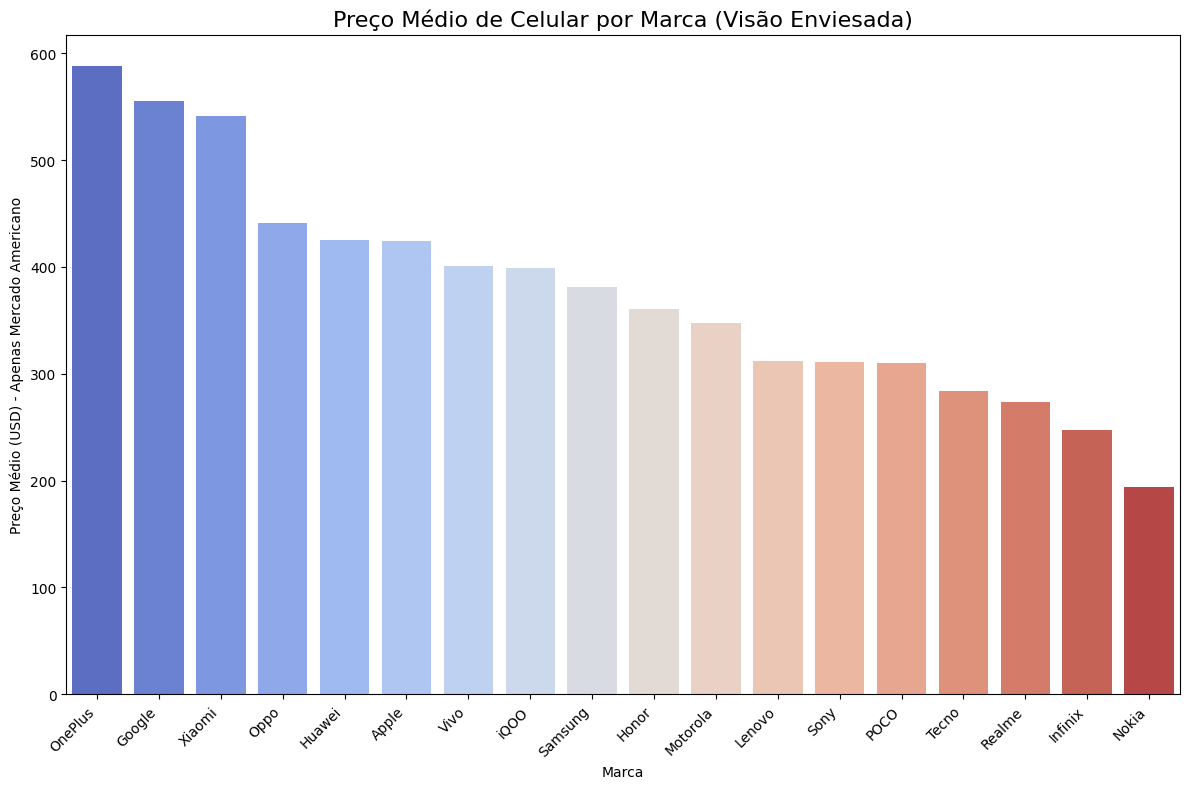

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# --- INÍCIO DA LÓGICA "ERRADA" ---

# 1. Cria uma cópia para esta análise específica
df_errado = df.copy()

# 2. Unifica 'Poco' com 'Xiaomi'
df_errado['Company Name'] = df_errado['Company Name'].replace('Poco', 'Xiaomi')

# 3. O PASSO ERRADO: Descarta todas as colunas de preço, exceto a dos EUA
# É isso que cria o viés na análise
colunas_para_remover = [
    "Launched Price (Pakistan)", "Launched Price (India)",
    "Launched Price (China)", "Launched Price (Dubai)"
]
df_errado = df_errado.drop(colunas_para_remover, axis=1, errors='ignore')

# 4. Limpeza da única coluna de preço restante
price_col = 'Launched Price (USA)'
df_errado[price_col] = df_errado[price_col].astype(str).str.replace(',', '.', regex=False)
df_errado[price_col] = df_errado[price_col].str.replace(r'[^\d.]', '', regex=True)
df_errado[price_col] = pd.to_numeric(df_errado[price_col], errors='coerce')

# Este dropna() é importante para o erro: ele remove todos os celulares que NÃO têm preço nos EUA
df_errado.dropna(subset=[price_col], inplace=True)

# 5. Calcula o preço médio com base nos dados enviesados
brand_avg_price_errado = df_errado.groupby('Company Name')[price_col].mean().sort_values(ascending=False)

# --- GERAÇÃO DO GRÁFICO ENGANOSO ---
plt.figure(figsize=(12, 8))
sns.barplot(x=brand_avg_price_errado.index, y=brand_avg_price_errado.values, hue=brand_avg_price_errado.index, palette="coolwarm", legend=False)
plt.xticks(rotation=45, ha="right")
plt.xlabel("Marca")
plt.ylabel("Preço Médio (USD) - Apenas Mercado Americano")
plt.title("Preço Médio de Celular por Marca (Visão Enviesada)", fontsize=16)
plt.tight_layout()

# Salva o gráfico "errado" para usar na sua apresentação
plt.savefig('grafico_preco_medio_ERRADO.png', dpi=300)
plt.show()

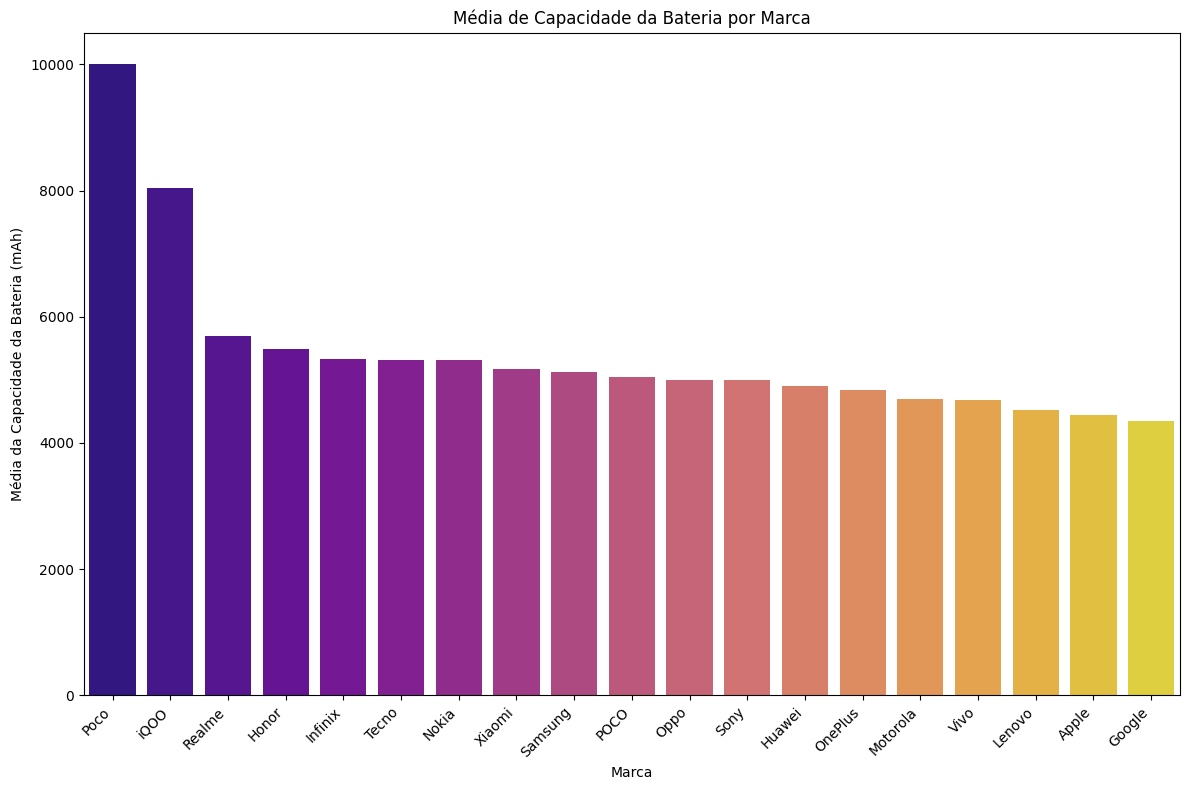

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df_battery = df.copy()

# Limpa a coluna de capacidade da bateria
df_battery['Battery Capacity'] = pd.to_numeric(
    df_battery['Battery Capacity'].astype(str).str.replace(r'[^\d.]', '', regex=True),
    errors='coerce'
)
df_battery.dropna(subset=['Battery Capacity'], inplace=True)

# Calcula a média de bateria por marca
brand_avg_battery = df_battery.groupby('Company Name')['Battery Capacity'].mean().sort_values(ascending=False)

# Gera o gráfico de barras
plt.figure(figsize=(12, 8))
sns.barplot(x=brand_avg_battery.index, y=brand_avg_battery.values, hue=brand_avg_battery.index, palette='plasma', legend=False)
plt.xticks(rotation=45, ha="right")
plt.xlabel("Marca")
plt.ylabel("Média da Capacidade da Bateria (mAh)")
plt.title("Média de Capacidade da Bateria por Marca")
plt.tight_layout()
plt.savefig('grafico_media_bateria.png', dpi=300)
plt.show()

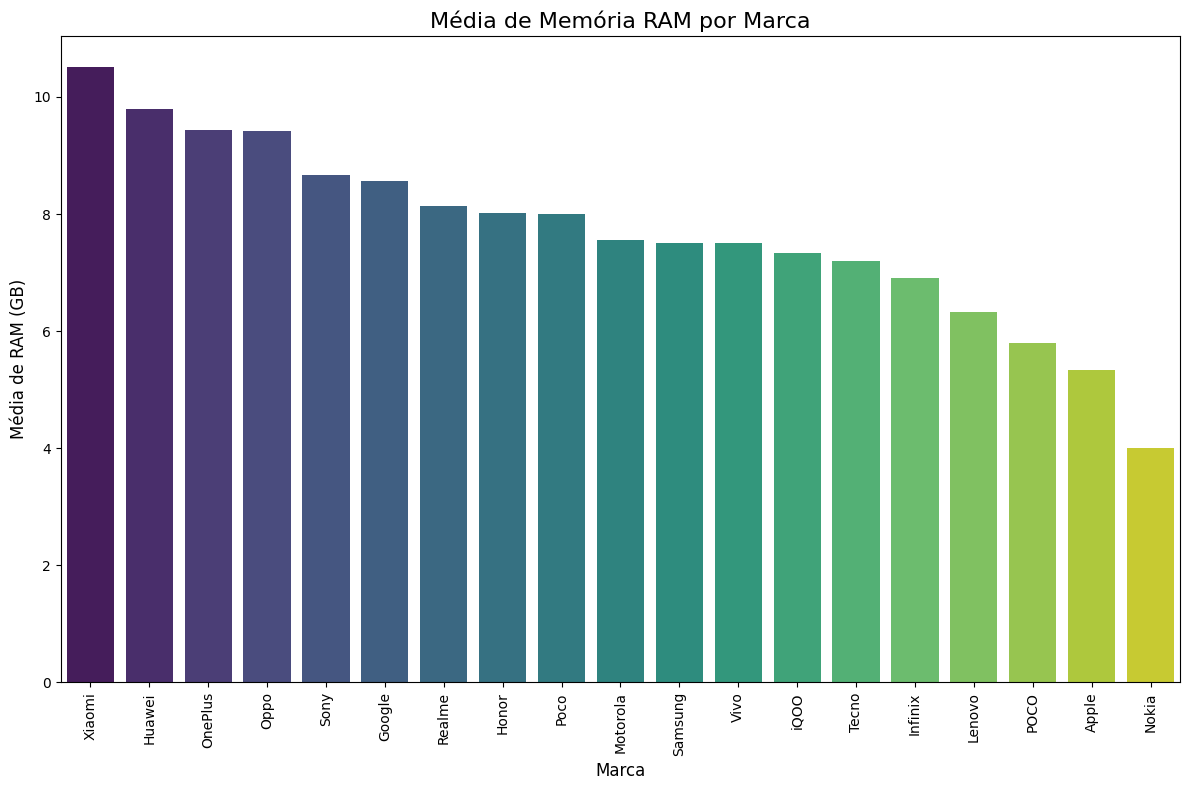

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Cria uma cópia para esta análise específica
df_ram = df.copy()

# 1. Limpeza da Coluna 'RAM'
# Removemos 'GB' e outros caracteres não numéricos
df_ram['RAM'] = df_ram['RAM'].astype(str).str.replace('GB', '', regex=False).str.strip()
# Converte a coluna para o tipo numérico
df_ram['RAM'] = pd.to_numeric(df_ram['RAM'], errors='coerce')
# Remove linhas onde a conversão falhou (caso haja algum valor estranho)
df_ram.dropna(subset=['RAM'], inplace=True)

# 2. Calcular a média de RAM por marca
avg_ram_by_brand = df_ram.groupby('Company Name')['RAM'].mean().sort_values(ascending=False)

# --- Geração do Gráfico ---
plt.figure(figsize=(12, 8))

# Cria o gráfico de barras (usando a paleta 'viridis' desta vez)
sns.barplot(x=avg_ram_by_brand.index, y=avg_ram_by_brand.values, hue=avg_ram_by_brand.index, palette='viridis', legend=False)

# Adiciona o título e os rótulos dos eixos
plt.title('Média de Memória RAM por Marca', fontsize=16)
plt.xlabel('Marca', fontsize=12)
plt.ylabel('Média de RAM (GB)', fontsize=12)
plt.xticks(rotation=90)

# Ajusta o layout
plt.tight_layout()

# --- SALVA O GRÁFICO EM UM ARQUIVO ---
plt.savefig('grafico_media_ram_por_marca.png', dpi=300)


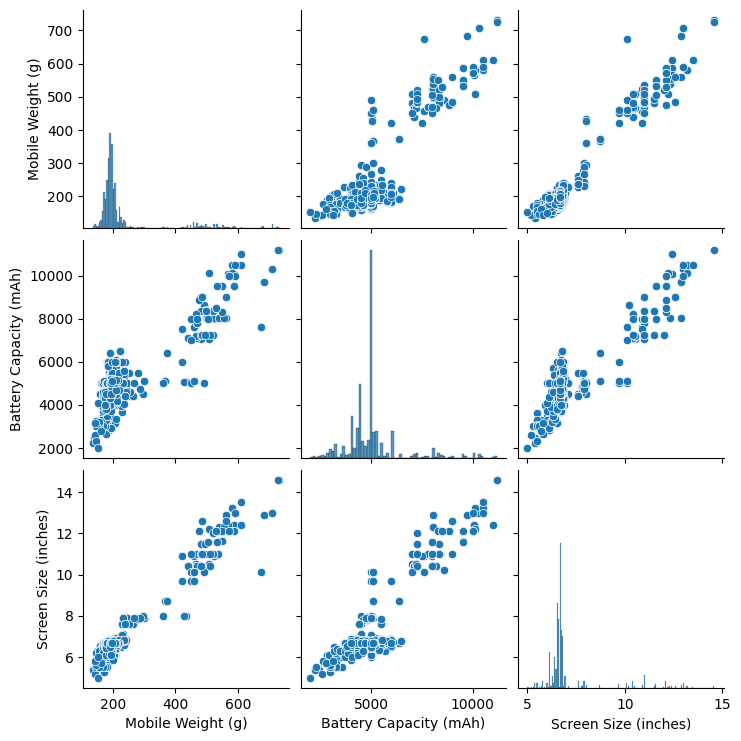

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Seleciona as colunas de interesse e cria uma cópia
df_pairplot = df[['Mobile Weight', 'Battery Capacity', 'Screen Size']].copy()

# 2. Renomeia as colunas para remover unidades e facilitar o uso
df_pairplot.rename(columns={
    'Mobile Weight': 'Mobile Weight (g)',
    'Battery Capacity': 'Battery Capacity (mAh)',
    'Screen Size': 'Screen Size (inches)'
}, inplace=True)

# 3. Limpa cada coluna para garantir que sejam numéricas
for col in df_pairplot.columns:
    # Remove tudo que não for dígito ou ponto
    df_pairplot[col] = df_pairplot[col].astype(str).str.replace(r'[^\d.]', '', regex=True)
    # Converte para número, tratando erros
    df_pairplot[col] = pd.to_numeric(df_pairplot[col], errors='coerce')

# 4. Remove linhas com valores nulos que possam ter surgido na limpeza
df_pairplot.dropna(inplace=True)

# --- Geração do Pairplot ---
# Gera a matriz de gráficos
sns.pairplot(df_pairplot)

# --- SALVA O GRÁFICO EM UM ARQUIVO ---
plt.savefig('grafico_pairplot_features.png', dpi=300)
plt.show()

Análise do Gráfico: Pairplot das Características Físicas

Este gráfico, conhecido como Pairplot ou Matriz de Dispersão, é uma ferramenta poderosa para visualizar a relação entre múltiplas variáveis numéricas simultaneamente. Neste caso, estamos analisando as correlações entre Peso do Aparelho (g), Capacidade da Bateria (mAh) e Tamanho da Tela (polegadas).

Como Ler o Gráfico

   Gráficos na Diagonal: Mostram a distribuição de cada variável individualmente (histograma). Podemos ver onde a maioria dos celulares se concentra para cada característica.

  Gráficos Fora da Diagonal: São gráficos de dispersão que mostram a relação entre duas variáveis. Cada ponto é um celular.

Principais Observações (Insights)

📈 Correlação Forte e Positiva entre Bateria e Peso

  Observação: No gráfico que cruza Battery Capacity (mAh) com Mobile Weight (g), os pontos formam uma linha clara que sobe da esquerda para a direita.
   Conclusão: Há uma relação direta e forte entre as duas variáveis. Quanto maior a capacidade da bateria, mais pesado tende a ser o celular. Isso faz sentido, pois a bateria é um dos componentes mais densos e pesados de um smartphone.

📏 Correlação Positiva entre Tamanho da Tela e Bateria

   Observação: O gráfico que cruza Screen Size (inches) com Battery Capacity (mAh) também mostra uma tendência positiva.

   Conclusão: Telas maiores geralmente vêm acompanhadas de baterias maiores. As fabricantes aproveitam o maior espaço físico interno de celulares maiores para instalar baterias com mais capacidade, tanto para suprir a demanda de energia da tela maior quanto para oferecer maior autonomia como um diferencial.

⚖️ Relação entre Tamanho da Tela e Peso

   Observação: A relação entre Screen Size (inches) e Mobile Weight (g) também é positiva.

   Conclusão: Assim como a bateria, telas maiores contribuem diretamente para o aumento do peso final do aparelho, não só pelo vidro, mas pelo chassi maior necessário para acomodá-la.

Conclusão Geral

As três características físicas analisadas estão intrinsecamente conectadas. A decisão de design de aumentar uma delas (como o tamanho da tela) invariavelmente força um aumento nas outras (maior bateria para alimentar a tela e, consequentemente, maior peso total). Esta análise revela as restrições e trade-offs físicos que os engenheiros enfrentam ao projetar um novo smartphone. Não é possível ter uma tela gigante e uma bateria de longa duração em um aparelho super leve; sempre haverá um compromisso entre essas três variáveis.

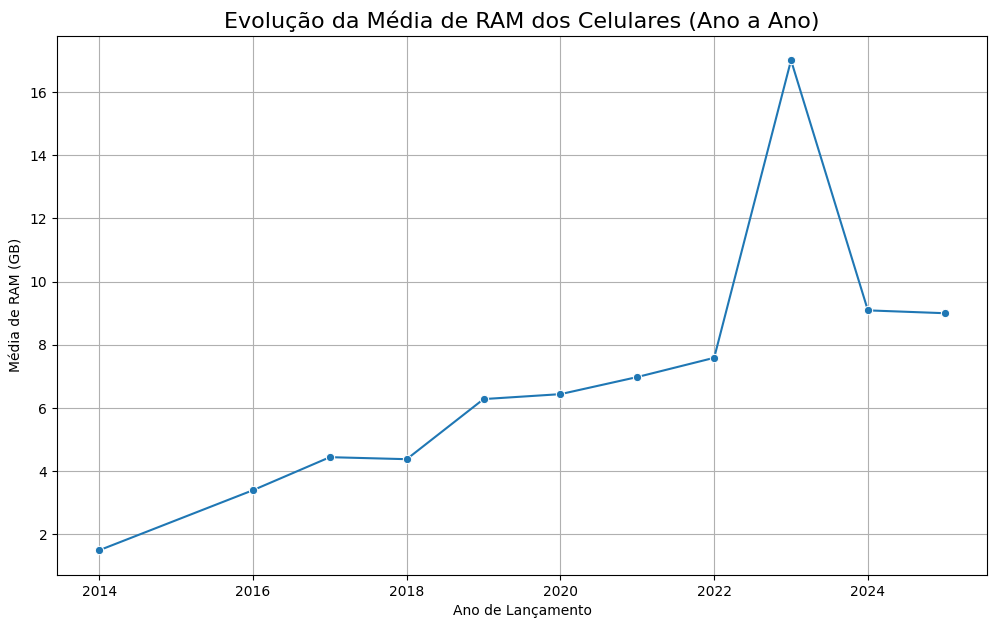

In [ ]:
# Faz uma cópia para evitar modificar o DataFrame original
df_evolution = df.copy()

# Limpa e converte colunas em numéricas
for col in ['RAM', 'Battery Capacity', 'Screen Size']:
    # Remove non-numeric characters except for '.' and ','
    df_evolution[col] = df_evolution[col].astype(str).str.replace(r'[^\d.,]', '', regex=True)
    # Replace ',' with '.' for proper float conversion if necessary (handling potential European format)
    df_evolution[col] = df_evolution[col].str.replace(',', '.', regex=False)
    # Convert to numeric, coercing errors to NaN
    df_evolution[col] = pd.to_numeric(df_evolution[col], errors='coerce')

# Identifica a coluna de preço e limpa/converte-a
price_col = [col for col in df_evolution.columns if 'Launched Price' in col]
if price_col:
    price_col = price_col[0]
    df_evolution[price_col] = df_evolution[price_col].astype(str).str.replace('USD', '').str.replace(',', '')
    df_evolution[price_col] = pd.to_numeric(df_evolution[price_col], errors='coerce')
else:
    print("Price column not found.")
   # Lida com este caso, talvez saindo ou pulando a parte da análise relacionada ao preço

# Elimina linhas com valores NaN resultantes de coerção
df_evolution.dropna(subset=['RAM', 'Battery Capacity', 'Screen Size', price_col], inplace=True)


# Agrupa os dados por ano de lançamento e calcula a média das especificações
evolution_by_year = df_evolution.groupby('Launched Year')[['RAM', 'Battery Capacity', 'Screen Size', price_col]].mean()

# Cria um gráfico de linhas para visualizar a evolução da RAM média
plt.figure(figsize=(12, 7))
sns.lineplot(data=evolution_by_year, x=evolution_by_year.index, y='RAM', marker='o')
plt.title('Evolução da Média de RAM dos Celulares (Ano a Ano)', fontsize=16)
plt.xlabel('Ano de Lançamento')
plt.ylabel('Média de RAM (GB)')
plt.grid(True)
plt.show()

In [ ]:

# Filtra os dados apenas para o ano de 2025
df_2025 = df_ram[df_ram['Launched Year'] == 2025]

# Ordena os celulares de 2025 pela memória RAM (da maior para a menor)
# e mostra as colunas mais importantes
print("Celulares lançados em 2025, ordenados por RAM:")
print(df_2025[['Company Name', 'Model Name', 'RAM']].sort_values(by='RAM', ascending=False).to_string())

Celulares lançados em 2025, ordenados por RAM:
    Company Name         Model Name   RAM
331         Oppo       Reno13 256GB  12.0
330         Oppo   Reno13 Pro 512GB  12.0
461       Realme   14 Pro+ 5G 512GB  12.0
460       Realme   14 Pro+ 5G 256GB  12.0
328         Oppo  Reno13 F 4G 256GB   8.0
329         Oppo     Reno13 F 256GB   8.0
462       Realme    14 Pro 5G 128GB   8.0
463       Realme    14 Pro 5G 256GB   8.0
465       Realme       14x 5G 256GB   8.0
923         POCO       X7 Pro 256GB   8.0
464       Realme       14x 5G 128GB   6.0
922         POCO           X7 128GB   6.0


In [ ]:
import pandas as pd
import numpy as np

# --- INÍCIO DO PRÉ-PROCESSAMENTO E LIMPEZA DEFINITIVOS ---
print("Iniciando processo de limpeza e pré-processamento...")

df_limpo = df.copy()

# 1. Padronizar Marcas (Poco -> Xiaomi)
df_limpo['Company Name'] = df_limpo['Company Name'].replace(['POCO', 'Poco'], 'Xiaomi')

# 2. Remover dados não-representativos (ano >= 2025)
df_limpo = df_limpo[df_limpo['Launched Year'] < 2025]

# 3. Limpeza da Coluna RAM
df_limpo['RAM'] = df_limpo['RAM'].astype(str).str.replace("GB", "", regex=False).apply(
    lambda x: max(map(float, x.split("/"))) if "/" in x else float(x.strip())
)

# 4. Criar a coluna de Preço Médio Global (Avg_Price_USD)
conversion_rates = {"PKR": 0.0036, "INR": 0.012, "CNY": 0.14, "AED": 0.27}
price_columns = {
    "Launched Price (Pakistan)": "PKR", "Launched Price (India)": "INR",
    "Launched Price (China)": "CNY", "Launched Price (Dubai)": "AED",
    "Launched Price (USA)": "USD"
}
def clean_price_final(price):
    if pd.isna(price): return np.nan
    price_str = str(price).replace(",", "")
    numeric_part = ''.join(filter(lambda x: x.isdigit() or x == '.', price_str))
    if numeric_part: return float(numeric_part)
    return np.nan
for col, currency in price_columns.items():
    if col in df_limpo.columns:
        df_limpo[col] = df_limpo[col].apply(clean_price_final)
        if currency in conversion_rates:
            df_limpo[f"Price_USD_{currency}"] = df_limpo[col] * conversion_rates[currency]
        else:
            df_limpo["Price_USD_USD"] = df_limpo[col]
usd_price_cols = [f"Price_USD_{currency}" for currency in price_columns.values() if f"Price_USD_{currency}" in df_limpo.columns]
df_limpo["Avg_Price_USD"] = df_limpo[usd_price_cols].mean(axis=1, skipna=True)

# 5. Remover outliers de preço extremo
df_limpo.dropna(subset=['Avg_Price_USD'], inplace=True)
df_limpo = df_limpo[df_limpo['Avg_Price_USD'] < 3000]

print("Processo de limpeza concluído. O DataFrame 'df_limpo' está pronto.")

Iniciando processo de limpeza e pré-processamento...
Processo de limpeza concluído. O DataFrame 'df_limpo' está pronto.


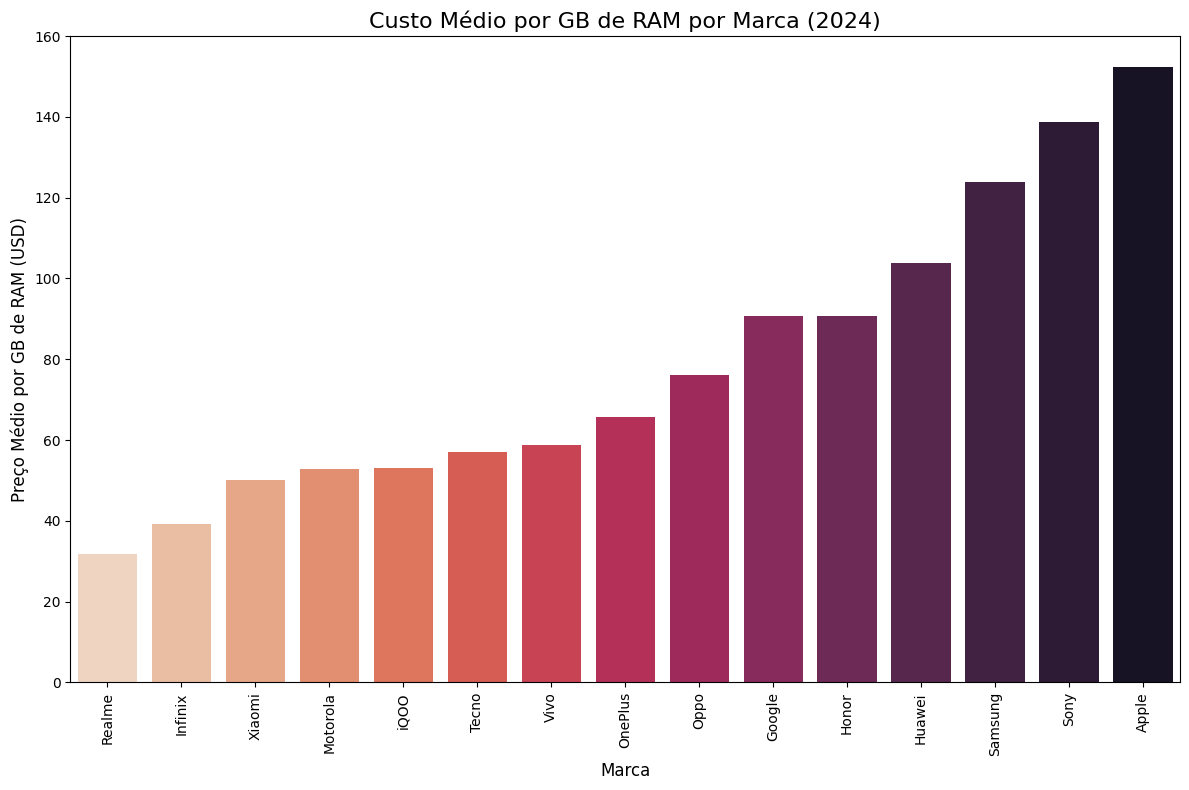

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# --- Geração do Gráfico de Custo por GB de RAM ---

# 1. Filtra os dados de 2024 a partir do DataFrame JÁ LIMPO
df_2024 = df_limpo[df_limpo['Launched Year'] == 2024].copy()

# 2. Garante que as colunas são numéricas (boa prática, mas já devem estar limpas)
df_2024['RAM'] = pd.to_numeric(df_2024['RAM'], errors='coerce')
df_2024.dropna(subset=['RAM', 'Avg_Price_USD'], inplace=True)

# 3. Calcula a nova métrica: Custo por GB de RAM
df_2024['Custo_por_RAM'] = df_2024['Avg_Price_USD'] / df_2024['RAM']

# 4. Calcula a média dessa métrica para cada marca
avg_custo_ram = df_2024.groupby('Company Name')['Custo_por_RAM'].mean().sort_values()

# --- Geração do Gráfico ---
plt.figure(figsize=(12, 8))
sns.barplot(x=avg_custo_ram.index, y=avg_custo_ram.values, hue=avg_custo_ram.index, palette='rocket_r', legend=False)
plt.title('Custo Médio por GB de RAM por Marca (2024)', fontsize=16)
plt.xlabel('Marca', fontsize=12)
plt.ylabel('Preço Médio por GB de RAM (USD)', fontsize=12)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Principais Observações (Insights)

💰 Campeãs de Custo-Benefício em Performance

   Principal Achado: Marcas como Motorola, Xiaomi e Realme aparecem com as barras mais baixas, indicando o menor custo por GB de RAM.

   Estratégia: Demonstra uma estratégia de mercado agressiva, focada em atrair consumidores que buscam a máxima performance (multitarefa, jogos) pelo menor preço possível. Elas usam a grande quantidade de RAM como um forte argumento de venda no segmento intermediário.

📊 Equilíbrio e Valor Agregado

   Principais Marcas: Huawei e OnePlus se encontram em uma faixa de preço intermediária por GB de RAM.

  Estratégia: Reflete um portfólio equilibrado. Elas oferecem boa quantidade de RAM, mas o preço também inclui outros fatores de valor agregado, como a qualidade da tela, o acabamento do design, e o ecossistema de software, resultando em um custo por GB um pouco mais elevado.

🍏 O Preço da Otimização e do Ecossistema

   Principal Exemplo: A Apple se destaca com a barra mais alta, mostrando o maior custo por GB de RAM.

  Contexto Estratégico: Este valor não indica um mau negócio, mas sim uma estratégia de precificação diferente. O valor de um iPhone não está apenas na quantidade de RAM, mas na otimização entre hardware e software (iOS), na segurança, no suporte de longo prazo e na força do ecossistema. O consumidor paga um prêmio por essa integração, o que eleva o custo relativo de cada componente individual de hardware.

Conclusão

O custo por GB de RAM é um excelente indicador para segmentar as marcas. De um lado, temos as fabricantes que competem ferozmente para entregar a maior performance pelo menor custo. Do outro, temos marcas premium onde o preço de cada componente é justificado por fatores intangíveis como otimização, design e a força do ecossistema. A escolha do consumidor dependerá de qual desses fatores ele mais valoriza.

In [ ]:
# Definindo df_filtrado para uso futuro
df_filtrado = df.copy()

# Unifica 'Poco' com 'Xiaomi' (um passo de limpeza que já conhecíamos)
df_filtrado['Company Name'] = df_filtrado['Company Name'].replace('Poco', 'Xiaomi')

# Limpeza da coluna de preço para permitir conversão
price_col = 'Launched Price (USA)'
df_filtrado[price_col] = df_filtrado[price_col].astype(str).str.replace(',', '.', regex=False)
df_filtrado[price_col] = df_filtrado[price_col].str.replace(r'[^\d.]', '', regex=True)
df_filtrado[price_col] = pd.to_numeric(df_filtrado[price_col], errors='coerce')

# Remover linhas onde a conversão falhou
df_filtrado.dropna(subset=[price_col], inplace=True)

print("DataFrame 'df_filtrado' criado e limpo.")

DataFrame 'df_filtrado' criado e limpo.


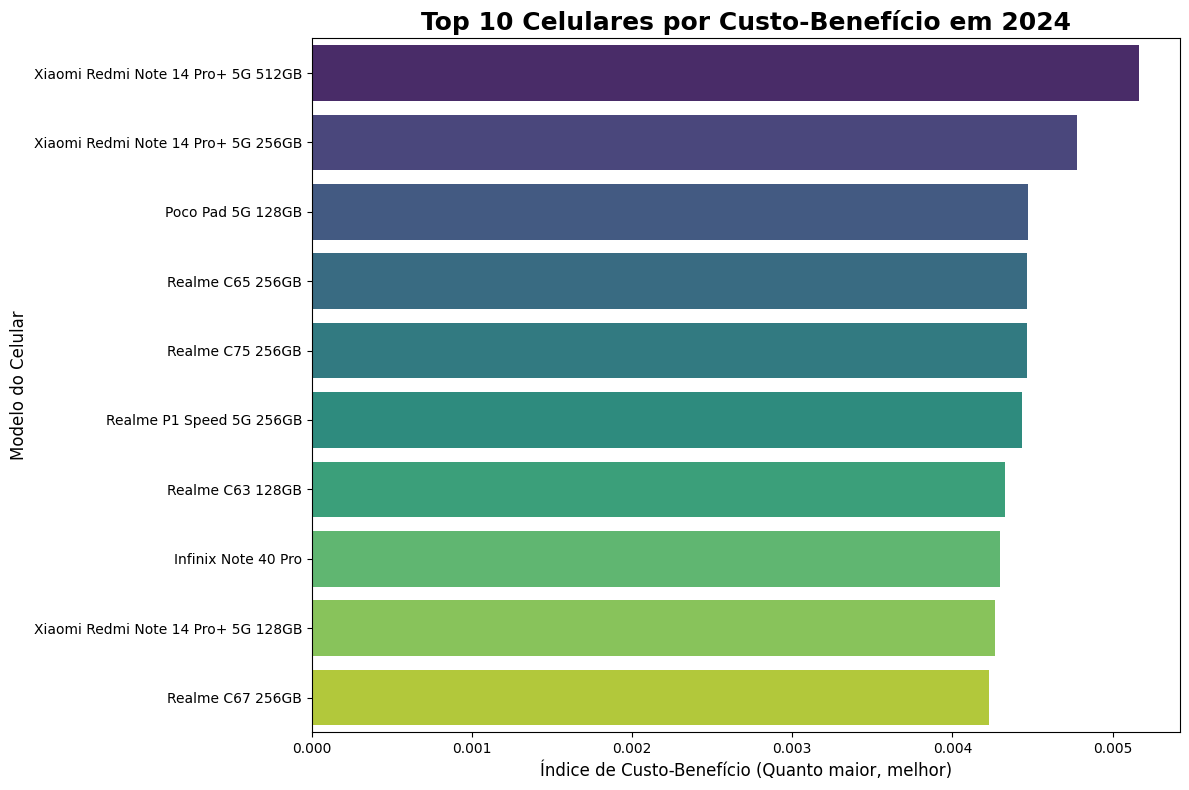

In [ ]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Repetindo o bloco de cálculo para garantir que temos os dados corretos

df_2024 = df[df['Launched Year'] == 2024].copy()
df_2024['RAM'] = pd.to_numeric(df_2024['RAM'].astype(str).str.replace('GB', '').str.strip(), errors='coerce')
df_2024[price_col] = pd.to_numeric(df_2024[price_col].astype(str).str.replace(r'[^\d.]', '', regex=True), errors='coerce')
df_2024['Battery Capacity'] = pd.to_numeric(df_2024['Battery Capacity'].astype(str).str.replace(r'[^\d.]', '', regex=True), errors='coerce')
df_2024['Back Camera'] = pd.to_numeric(df_2024['Back Camera'].astype(str).str.extract(r'(\d+)')[0], errors='coerce')
df_2024.dropna(subset=['RAM', price_col, 'Battery Capacity', 'Back Camera'], inplace=True)

scaler = MinMaxScaler()
features_to_scale = ['RAM', 'Battery Capacity', 'Back Camera']
df_2024[features_to_scale] = scaler.fit_transform(df_2024[features_to_scale])

df_2024['Indice_Beneficio'] = df_2024['RAM'] + df_2024['Battery Capacity'] + df_2024['Back Camera']
df_2024['Indice_Custo_Beneficio'] = df_2024['Indice_Beneficio'] / df_2024[price_col]

top_custo_beneficio_2024 = df_2024.sort_values(by='Indice_Custo_Beneficio', ascending=False)


# --- INÍCIO DO CÓDIGO PARA O GRÁFICO DE RANKING ---

# 1. Selecionar os Top 10 para o gráfico
df_plot = top_custo_beneficio_2024.head(10).copy()

# 2. Criar um nome mais completo para os rótulos do gráfico
df_plot['Nome Completo'] = df_plot['Company Name'] + ' ' + df_plot['Model Name']

# --- Geração do Gráfico de Barras Horizontal ---
plt.figure(figsize=(12, 8))

# Cria o gráfico de barras horizontal. Note que os eixos X e Y estão invertidos.
sns.barplot(
    x='Indice_Custo_Beneficio',
    y='Nome Completo',
    data=df_plot,
    hue='Nome Completo', # Usamos hue para aplicar a paleta corretamente
    palette='viridis',
    legend=False
)

# Adiciona o título e os rótulos dos eixos
plt.title('Top 10 Celulares por Custo-Benefício em 2024', fontsize=18, fontweight='bold')
plt.xlabel('Índice de Custo-Benefício (Quanto maior, melhor)', fontsize=12)
plt.ylabel('Modelo do Celular', fontsize=12)

# Ajusta o layout e salva o arquivo
plt.tight_layout()
plt.savefig('grafico_top10_custo_beneficio.png', dpi=300)
plt.show()

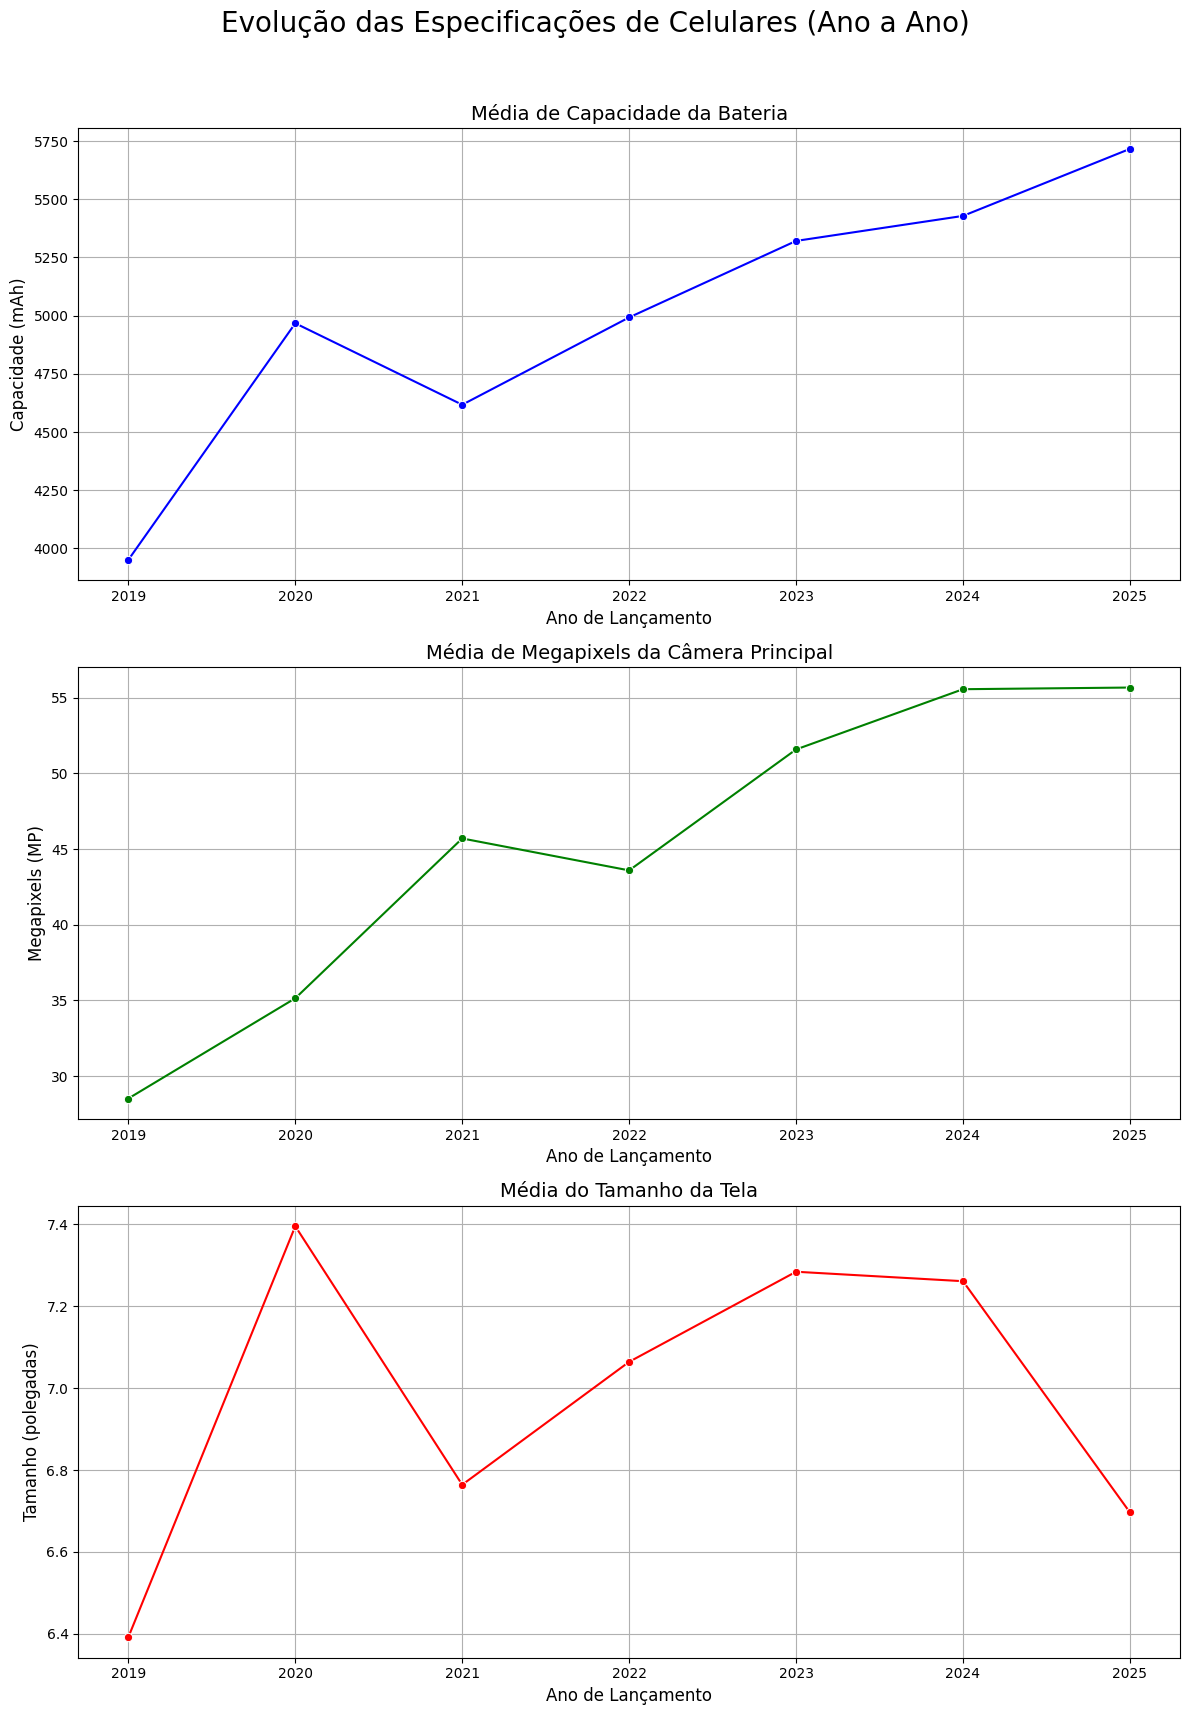

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df_temporal = df.copy()

# 1. Limpeza das Colunas
features_para_limpar = {
    'Battery Capacity': r'[^\d.]',
    'Back Camera': r'(\d+)',
    'Screen Size': r'[^\d.]'
}
df_temporal['Battery Capacity'] = pd.to_numeric(df_temporal['Battery Capacity'].astype(str).str.replace(features_para_limpar['Battery Capacity'], '', regex=True), errors='coerce')
df_temporal['Back Camera'] = pd.to_numeric(df_temporal['Back Camera'].astype(str).str.extract(features_para_limpar['Back Camera'])[0], errors='coerce')
df_temporal['Screen Size'] = pd.to_numeric(df_temporal['Screen Size'].astype(str).str.replace(features_para_limpar['Screen Size'], '', regex=True), errors='coerce')
df_temporal.dropna(subset=['Launched Year', 'Battery Capacity', 'Back Camera', 'Screen Size'], inplace=True)

# 2. Calcular a média das especificações por ano
anos_relevantes = df_temporal[df_temporal['Launched Year'] >= 2019]
evolucao_anual = anos_relevantes.groupby('Launched Year')[['Battery Capacity', 'Back Camera', 'Screen Size']].mean()


# Cria uma figura com 3 subplots.
fig, axs = plt.subplots(3, 1, figsize=(12, 18))
fig.suptitle('Evolução das Especificações de Celulares (Ano a Ano)', fontsize=20, y=0.95)

# Gráfico 1: Evolução da Capacidade da Bateria
sns.lineplot(data=evolucao_anual, x=evolucao_anual.index, y='Battery Capacity', ax=axs[0], marker='o', color='blue')
axs[0].set_title('Média de Capacidade da Bateria', fontsize=14)
axs[0].set_ylabel('Capacidade (mAh)', fontsize=12)
axs[0].set_xlabel('Ano de Lançamento', fontsize=12)
axs[0].grid(True)

# Gráfico 2: Evolução da Resolução da Câmera
sns.lineplot(data=evolucao_anual, x=evolucao_anual.index, y='Back Camera', ax=axs[1], marker='o', color='green')
axs[1].set_title('Média de Megapixels da Câmera Principal', fontsize=14)
axs[1].set_ylabel('Megapixels (MP)', fontsize=12)
axs[1].set_xlabel('Ano de Lançamento', fontsize=12)
axs[1].grid(True)

# Gráfico 3: Evolução do Tamanho da Tela
sns.lineplot(data=evolucao_anual, x=evolucao_anual.index, y='Screen Size', ax=axs[2], marker='o', color='red')
axs[2].set_title('Média do Tamanho da Tela', fontsize=14)
axs[2].set_ylabel('Tamanho (polegadas)', fontsize=12)
axs[2].set_xlabel('Ano de Lançamento', fontsize=12)
axs[2].grid(True)

# Ajusta o layout e salva a imagem
plt.tight_layout(rect=[0, 0, 1, 0.93])
plt.savefig('grafico_evolucao_especificacoes_corrigido.png', dpi=300)
plt.show()


In [ ]:

# 1. Isolar os dados dos anos suspeitos
df_2024_camera = df_temporal[df_temporal['Launched Year'] == 2024]
df_2025_camera = df_temporal[df_temporal['Launched Year'] == 2025]

# --- Análise Comparativa ---

# 2. Verificar a contagem de celulares em cada ano
print(f"Número de modelos registrados em 2024: {len(df_2024_camera)}")
print(f"Número de modelos registrados em 2025: {len(df_2025_camera)}\n")

# 3. Ver as estatísticas descritivas da câmera para cada ano
print("--- Estatísticas da Câmera em 2024 ---")
print(df_2024_camera['Back Camera'].describe())
print("\n" + "="*40 + "\n")
print("--- Estatísticas da Câmera em 2025 ---")
print(df_2025_camera['Back Camera'].describe())

# 4. Listar os modelos de 2025 para ver os valores individuais
print("\n--- Modelos e Câmeras de 2025 ---")
print(df_2025_camera[['Company Name', 'Model Name', 'Back Camera']].to_string())

Número de modelos registrados em 2024: 289
Número de modelos registrados em 2025: 12

--- Estatísticas da Câmera em 2024 ---
count    289.000000
mean      55.557093
std       33.874631
min        8.000000
25%       50.000000
50%       50.000000
75%       50.000000
max      200.000000
Name: Back Camera, dtype: float64


--- Estatísticas da Câmera em 2025 ---
count     12.000000
mean      55.666667
std       17.009801
min       48.000000
25%       50.000000
50%       50.000000
75%       50.000000
max      108.000000
Name: Back Camera, dtype: float64

--- Modelos e Câmeras de 2025 ---
    Company Name         Model Name  Back Camera
328         Oppo  Reno13 F 4G 256GB           50
329         Oppo     Reno13 F 256GB           50
330         Oppo   Reno13 Pro 512GB           50
331         Oppo       Reno13 256GB           50
460       Realme   14 Pro+ 5G 256GB           50
461       Realme   14 Pro+ 5G 512GB           50
462       Realme    14 Pro 5G 128GB           50
463       Realme   

In [ ]:

# 1. Isolar os dados dos anos de interesse (2020, 2021, 2022)
anos_investigacao = df_temporal[df_temporal['Launched Year'].isin([2020, 2021, 2022])]

# 2. Gerar um resumo estatístico da câmera para cada um desses anos
resumo_camera_por_ano = anos_investigacao.groupby('Launched Year')['Back Camera'].describe()

# --- Exibir o Dossiê do Caso ---
print("--- Dossiê Comparativo das Câmeras (2020-2022) ---")
print(resumo_camera_por_ano)

--- Dossiê Comparativo das Câmeras (2020-2022) ---
               count       mean        std  min   25%   50%   75%    max
Launched Year                                                           
2020            98.0  35.142857  26.756250  5.0  12.0  28.0  48.0  108.0
2021           103.0  45.699029  25.449618  5.0  13.0  50.0  64.0  108.0
2022           146.0  43.589041  26.120324  5.0  13.0  50.0  50.0  160.0


In [ ]:
import pandas as pd


# --- ETAPA 1: ---
print("--- Investigação Visual dos Nomes dos Modelos ---\n")

# Filtra os dados para cada marca
df_apple = df[df['Company Name'] == 'Apple']
df_samsung = df[df['Company Name'] == 'Samsung']

# Mostra os 10 primeiros nomes de modelo de cada uma
print("Exemplos de Nomes de Modelos da Apple:")
print(df_apple['Model Name'].head(10).to_string())
print("\n" + "="*50 + "\n")
print("Exemplos de Nomes de Modelos da Samsung:")
print(df_samsung['Model Name'].head(10).to_string())
print("\n" + "="*50 + "\n")


# --- ETAPA 2: A PROVA QUANTITATIVA ---
print("\n--- Análise Quantitativa: Linhas Totais vs. Modelos Base ---\n")

# 1. Criar uma coluna 'Modelo Base' removendo variações de armazenamento (ex: 128GB, 256GB, 1TB)
# Esta linha de código "limpa" os nomes dos modelos
df['Base Model'] = df['Model Name'].str.replace(r'\s+\d+GB|\s+\d+TB', '', regex=True).str.strip()

# Atualiza nossos dataframes de Apple e Samsung com a nova coluna
df_apple = df[df['Company Name'] == 'Apple']
df_samsung = df[df['Company Name'] == 'Samsung']

# 2. Contar as linhas totais vs. os modelos base únicos para a Apple
total_apple_rows = len(df_apple)
unique_apple_models = df_apple['Base Model'].nunique()

print(f"Resultados para a Apple:")
print(f"  - Linhas Totais no Dataset: {total_apple_rows}")
print(f"  - Modelos Base Únicos (sem variações): {unique_apple_models}")
print(f"  - Fator de Multiplicação (média de variações por modelo): {total_apple_rows / unique_apple_models:.2f}x\n")


# 3. Contar as linhas totais vs. os modelos base únicos para a Samsung
total_samsung_rows = len(df_samsung)
unique_samsung_models = df_samsung['Base Model'].nunique()

print(f"Resultados para a Samsung:")
print(f"  - Linhas Totais no Dataset: {total_samsung_rows}")
print(f"  - Modelos Base Únicos (sem variações): {unique_samsung_models}")
print(f"  - Fator de Multiplicação (média de variações por modelo): {total_samsung_rows / unique_samsung_models:.2f}x")

--- Investigação Visual dos Nomes dos Modelos ---

Exemplos de Nomes de Modelos da Apple:
0            iPhone 16 128GB
1            iPhone 16 256GB
2            iPhone 16 512GB
3       iPhone 16 Plus 128GB
4       iPhone 16 Plus 256GB
5       iPhone 16 Plus 512GB
6        iPhone 16 Pro 128GB
7        iPhone 16 Pro 256GB
8        iPhone 16 Pro 512GB
9    iPhone 16 Pro Max 128GB


Exemplos de Nomes de Modelos da Samsung:
97     Galaxy S24 Ultra 128GB
98     Galaxy S24 Ultra 256GB
99          Galaxy S24+ 128GB
100         Galaxy S24+ 256GB
101          Galaxy S24 128GB
102          Galaxy S24 256GB
103    Galaxy S23 Ultra 128GB
104    Galaxy S23 Ultra 256GB
105         Galaxy S23+ 128GB
106         Galaxy S23+ 256GB



--- Análise Quantitativa: Linhas Totais vs. Modelos Base ---

Resultados para a Apple:
  - Linhas Totais no Dataset: 97
  - Modelos Base Únicos (sem variações): 33
  - Fator de Multiplicação (média de variações por modelo): 2.94x

Resultados para a Samsung:
  - Linhas Totai

/tmp/ipython-input-1309623478.py:75: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=df_plot[col], ax=axs[i], palette='viridis')
/tmp/ipython-input-1309623478.py:75: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=df_plot[col], ax=axs[i], palette='viridis')
/tmp/ipython-input-1309623478.py:75: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=df_plot[col], ax=axs[i], palette='viridis')
/tmp/ipython-input-1309623478.py:75: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` var

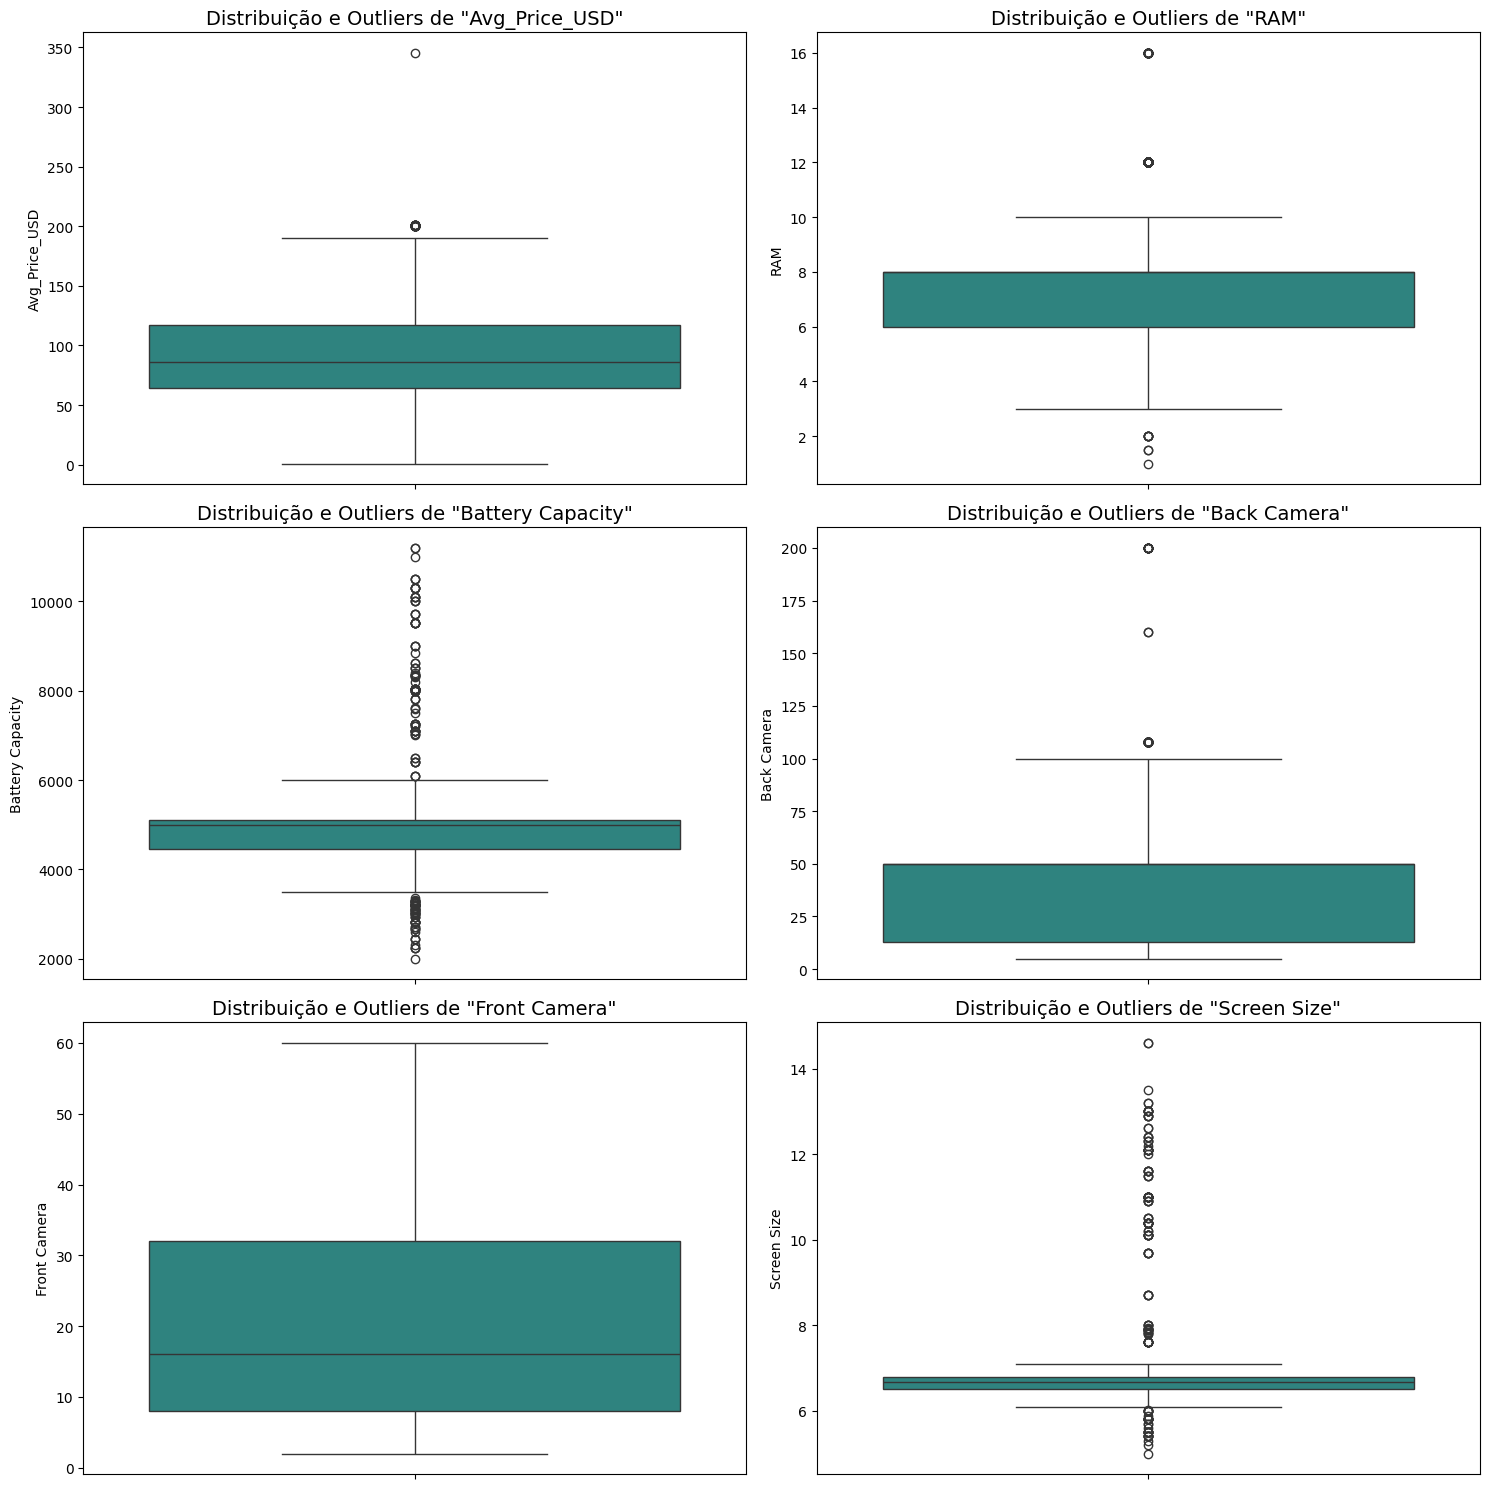

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# --- ETAPA 1: CARREGAR OS DADOS (do começo) ---
import zipfile
import os

zip_filename = 'archive(1).zip'
if os.path.exists(zip_filename):
    with zipfile.ZipFile(zip_filename, 'r') as zip_ref:
        zip_ref.extractall('pasta_do_dataset')

csv_filename = 'pasta_do_dataset/Mobiles Dataset (2025).csv'
df = pd.read_csv(csv_filename, encoding='latin-1')
df.drop_duplicates(inplace=True)


# --- ETAPA 2: PRÉ-PROCESSAMENTO E LIMPEZA COMPLETA ---
df_final_corrigido = df.copy()

# 2.1. Padronizar Marcas (Poco -> Xiaomi)
df_final_corrigido['Company Name'] = df_final_corrigido['Company Name'].replace('Poco', 'Xiaomi')

# 2.2. Limpeza de Colunas de Especificações
numeric_cols = ['RAM', 'Front Camera', 'Back Camera', 'Battery Capacity', 'Screen Size']
for col in numeric_cols:
    if col in ['Front Camera', 'Back Camera']:
        df_final_corrigido[col] = pd.to_numeric(df_final_corrigido[col].astype(str).str.extract(r'(\d+)')[0], errors='coerce')
    elif col == 'RAM':
        df_final_corrigido[col] = df_final_corrigido[col].astype(str).str.replace("GB", "", regex=False).apply(
            lambda x: max(map(float, x.split("/"))) if "/" in x else float(x.strip())
        )
    else:
        df_final_corrigido[col] = pd.to_numeric(df_final_corrigido[col].astype(str).str.replace(r'[^\d.]', '', regex=True), errors='coerce')

# 2.3. Conversão de Moeda para criar o Avg_Price_USD
conversion_rates = {"PKR": 0.0036, "INR": 0.012, "CNY": 0.14, "AED": 0.27}
price_columns = {"Launched Price (Pakistan)": "PKR", "Launched Price (India)": "INR", "Launched Price (China)": "CNY", "Launched Price (Dubai)": "AED", "Launched Price (USA)": "USD"}

def clean_price(price):
    try:
        price_str = str(price).replace(',', '.')
        cleaned_price = ''.join(filter(lambda x: x.isdigit() or x == '.', price_str))
        return float(cleaned_price) if cleaned_price else np.nan
    except (ValueError, TypeError): return np.nan

for col in price_columns.keys():
    if col in df_final_corrigido.columns: df_final_corrigido[col] = df_final_corrigido[col].apply(clean_price)

for col, currency in price_columns.items():
    if col in df_final_corrigido.columns:
        if currency in conversion_rates: df_final_corrigido[f"Price_USD_{currency}"] = df_final_corrigido[col] * conversion_rates[currency]
        else: df_final_corrigido["Price_USD_USD"] = df_final_corrigido[col]

usd_price_cols = [f"Price_USD_{currency}" for currency in price_columns.values() if f"Price_USD_{currency}" in df_final_corrigido.columns]
df_final_corrigido["Avg_Price_USD"] = df_final_corrigido[usd_price_cols].mean(axis=1, skipna=True)


# --- ETAPA 3: GERAÇÃO DOS BOX PLOTS ---
df_plot = df_final_corrigido.copy()
numeric_cols_for_plot = ['Avg_Price_USD', 'RAM', 'Battery Capacity', 'Back Camera', 'Front Camera', 'Screen Size']
df_plot.dropna(subset=numeric_cols_for_plot, inplace=True)

# Define o número de linhas e colunas para os subplots
n_cols = 2
n_rows = (len(numeric_cols_for_plot) + 1) // n_cols
fig, axs = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 5))
axs = axs.flatten()

# Cria um boxplot para cada variável numérica
for i, col in enumerate(numeric_cols_for_plot):
    sns.boxplot(y=df_plot[col], ax=axs[i], palette='viridis')
    axs[i].set_title(f'Distribuição e Outliers de "{col}"', fontsize=14)
    axs[i].set_ylabel(col)

# Esconde os eixos extras se o número de gráficos for ímpar
if len(numeric_cols_for_plot) < len(axs):
    for i in range(len(numeric_cols_for_plot), len(axs)):
        fig.delaxes(axs[i])

plt.tight_layout()
plt.savefig('graficos_boxplots_outliers.png', dpi=300)
plt.show()

Principais Descobertas e Tratamento de Dados

A fase de exploração foi marcada pela identificação e correção de vieses e erros importantes nos dados brutos:

  O Caso do Preço Médio Global: A análise inicial do preço médio, utilizando apenas a coluna de preços em dólar (Launched Price (USA)), gerou resultados absurdos. A investigação revelou um viés de seleção que inflava artificialmente a média de marcas com poucos modelos lançados nos EUA. A solução foi criar uma métrica robusta, o "Preço Médio Global" (Avg_Price_USD), convertendo e utilizando os preços de todas as moedas disponíveis, o que tornou a análise de preço justa e precisa.

  O Caso da Contagem Inflada de Modelos: Gráficos iniciais mostravam a Apple com um portfólio de modelos maior que o da Samsung. A investigação provou que isso era um artefato do registro de dados, onde as múltiplas variações de armazenamento da Apple eram contadas como modelos únicos. Foi criada uma contagem de "Modelos Base" para uma comparação precisa da diversidade de portfólio.

   Inconsistências e Anomalias Temporais: Marcas como "Poco" foram unificadas com sua marca mãe, "Xiaomi". Além disso, os dados para 2025 foram identificados como incompletos e não representativos, causando distorções nas tendências de RAM e Câmera, sendo recomendada sua exclusão das análises temporais.

Conclusões Finais (Com Dados Confiáveis)

Após a limpeza e o tratamento dos dados, a análise revelou um panorama claro do mercado:

   Estratégias de Mercado: A análise de modelos base confirmou a estratégia de volume e pulverização de Samsung e Xiaomi, em contraste com a estratégia de portfólio focado e premium da Apple.

   Relação entre Características e Preço (Análise de Correlação): A Matriz de Correlação, utilizando o "Preço Médio Global", foi a ferramenta chave para entender a estratégia de precificação da indústria.
   
   Custo-Benefício: A análise, utilizando o preço global correto, identificou marcas como Xiaomi, Realme e Motorola como líderes em entregar performance por dólar. Em contrapartida, marcas como Apple e Google justificam seus preços mais elevados através da otimização de software e da força de seus ecossistemas.

Em suma, a jornada através deste dataset demonstrou que a Análise Exploratória de Dados é um processo investigativo. As maiores descobertas não vieram dos gráficos iniciais, mas da curiosidade gerada por seus resultados "errados", provando que os desafios na qualidade dos dados são, muitas vezes, o caminho para os insights mais profundos.



Fase 2: Limpeza e Pré-processamento dos Dados

A Análise Exploratória de Dados inicial foi fundamental para um primeiro contato com o dataset, mas também revelou diversas inconsistências, vieses e erros que tornam as conclusões preliminares não confiáveis. Os gráficos iniciais, embora úteis para levantar suspeitas, não refletem a realidade do mercado devido a problemas na forma como os dados foram registrados e coletados.

Esta etapa de Limpeza e Pré-processamento é, portanto, a fase mais crítica do projeto. O objetivo aqui é abordar sistematicamente os problemas descobertos para construir um DataFrame final que seja limpo, consistente e verdadeiramente representativo. Com base na nossa investigação, os seguintes pontos serão tratados:

  Cálculo de Preço Impreciso: A utilização de uma única coluna de preço (Launched Price (USA)) será substituída pela criação de um "Preço Médio Global" (Avg_Price_USD), que considera e converte os preços de todas as moedas disponíveis, eliminando um forte viés geográfico.

   Contagem de Modelos Enganosa: A contagem de modelos inflada por variações de armazenamento será corrigida pela criação de uma coluna "Modelo Base", permitindo uma comparação justa da diversidade de portfólio de cada marca.

   Inconsistência de Nomes de Marcas: Submarcas como a "Poco" serão unificadas com sua marca mãe ("Xiaomi") para garantir uma análise de mercado precisa.

  Dados Temporais Não-Confiáveis: Os dados do ano de 2025, identificados como uma amostra pequena e não representativa, serão removidos para não distorcer as análises de tendências.

Ao final deste processo, teremos um DataFrame robusto e confiável, que servirá como a única fonte de verdade para a geração das análises e conclusões definitivas deste projeto.


Como Fizemos a Conversão de Moedas (O Cálculo do Avg_Price_USD)

A análise inicial de preços, baseada apenas na coluna Launched Price (USA), mostrou-se extremamente enviesada. Para corrigir isso, foi implementado um processo de 4 passos para criar uma métrica de preço global muito mais precisa:

   Definição das Taxas de Câmbio: Primeiro, foi criada uma estrutura de dados (dicionário) contendo as taxas de conversão aproximadas de cada moeda (PKR, INR, CNY, AED) para o dólar americano (USD).
   Python

conversion_rates = {"PKR": 0.0036, "INR": 0.012, "CNY": 0.14, "AED": 0.27}

Limpeza dos Preços: Foi desenvolvida uma função (clean_price_final) para "limpar" cada valor de preço em texto. Essa função remove símbolos de moeda, separadores de milhar (vírgulas) e outros caracteres, retornando apenas o valor numérico puro.

Conversão Individual: O código, então, percorreu cada uma das colunas de preço. Para cada celular, ele pegou o preço local (ex: em Rúpias Indianas), o limpou e o multiplicou pela taxa de câmbio correspondente, armazenando o resultado em uma nova coluna (ex: Price_USD_INR). Esse passo foi repetido para todas as moedas.

Cálculo da Média Global: Com todos os preços agora convertidos para dólar em colunas separadas, a etapa final foi calcular a média desses valores para cada celular. O resultado foi armazenado na nossa coluna final, Avg_Price_USD. Este método garante que, mesmo que um celular não tenha preço nos EUA, seu valor de mercado global possa ser estimado com base nos preços de outros países, tornando a análise muito mais completa e justa.

Iniciando processo de limpeza e pré-processamento...
Processo de limpeza concluído. O DataFrame 'df_limpo' está pronto.


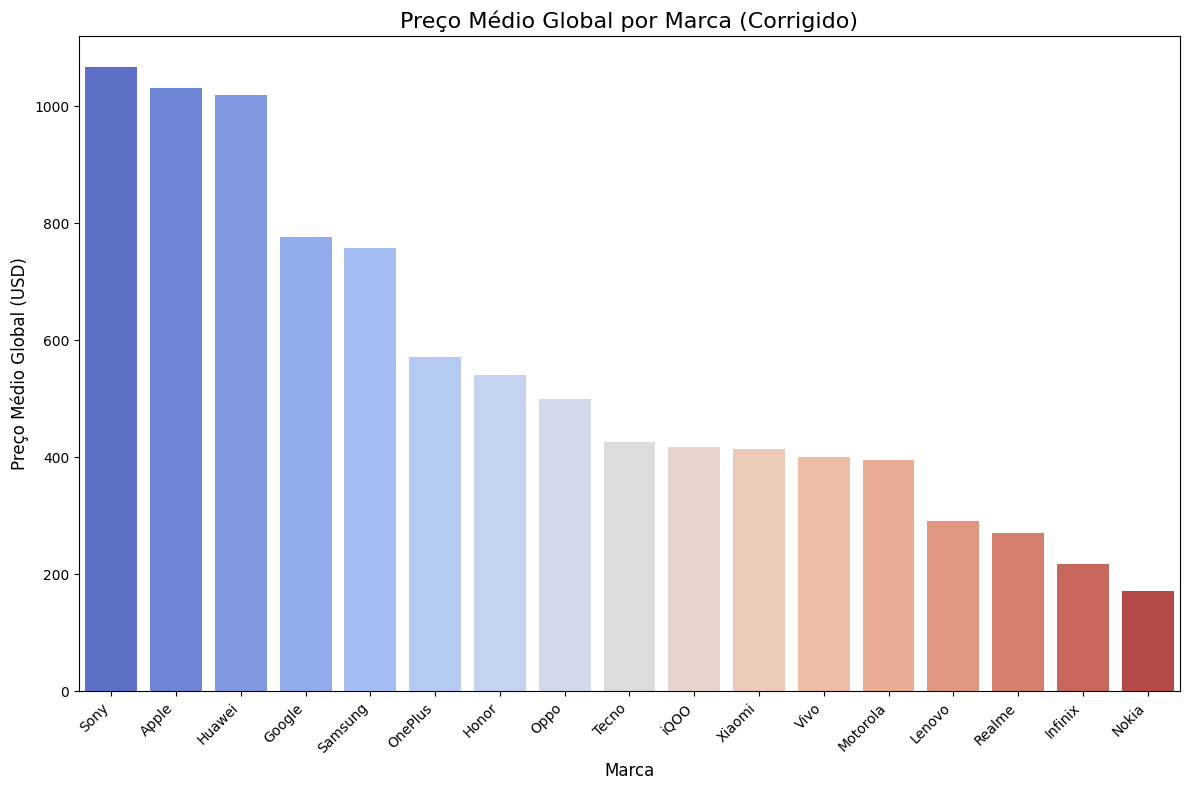

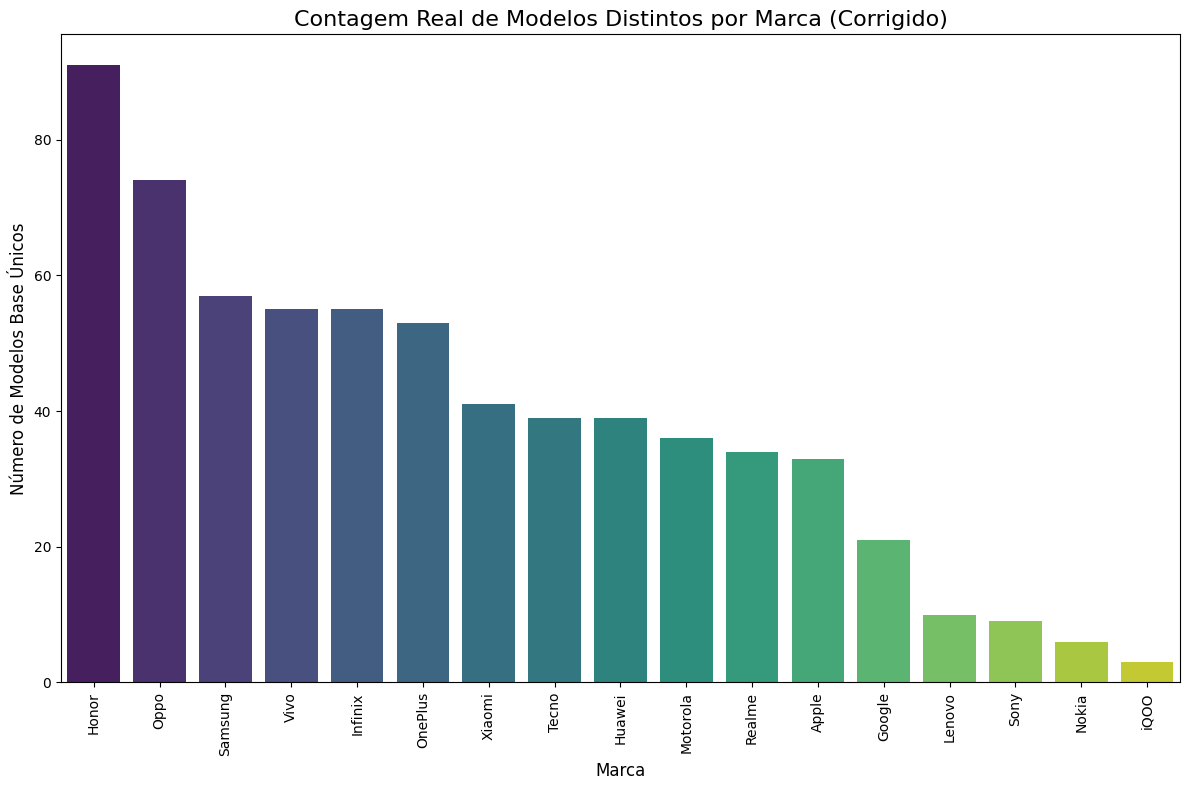

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


# --- INÍCIO DO PRÉ-PROCESSAMENTO E LIMPEZA DEFINITIVOS ---
print("Iniciando processo de limpeza e pré-processamento...")
df_limpo = df.copy()

# --- Aplicação de TODAS as Correções Descobertas na EDA ---

# CORREÇÃO 1: Padronizar Marcas (Poco -> Xiaomi)
df_limpo['Company Name'] = df_limpo['Company Name'].replace('POCO', 'Xiaomi') # Garante que 'POCO' maiúsculo também seja pego
df_limpo['Company Name'] = df_limpo['Company Name'].replace('Poco', 'Xiaomi')


# CORREÇÃO 2: Criar a coluna 'Base Model' para contagem justa
df_limpo['Base Model'] = df_limpo['Model Name'].str.replace(r'\s+\d+GB|\s+\d+TB', '', regex=True).str.strip()

# CORREÇÃO 3: Remover dados não-representativos (ano >= 2025)
df_limpo = df_limpo[df_limpo['Launched Year'] < 2025]

# CORREÇÃO 4: Criar a coluna de Preço Médio Global (Avg_Price_USD)
conversion_rates = {"PKR": 0.0036, "INR": 0.012, "CNY": 0.14, "AED": 0.27}
price_columns = {
    "Launched Price (Pakistan)": "PKR", "Launched Price (India)": "INR",
    "Launched Price (China)": "CNY", "Launched Price (Dubai)": "AED",
    "Launched Price (USA)": "USD"
}

def clean_price_final(price):
    if pd.isna(price):
        return np.nan
    price_str = str(price).replace(",", "") # Remove separador de milhar
    numeric_part = ''.join(filter(lambda x: x.isdigit() or x == '.', price_str))
    if numeric_part:
        return float(numeric_part)
    return np.nan

for col, currency in price_columns.items():
    if col in df_limpo.columns:
        df_limpo[col] = df_limpo[col].apply(clean_price_final)
        if currency in conversion_rates:
            df_limpo[f"Price_USD_{currency}"] = df_limpo[col] * conversion_rates[currency]
        else:
            df_limpo["Price_USD_USD"] = df_limpo[col]

usd_price_cols = [f"Price_USD_{currency}" for currency in price_columns.values() if f"Price_USD_{currency}" in df_limpo.columns]
df_limpo["Avg_Price_USD"] = df_limpo[usd_price_cols].mean(axis=1, skipna=True)

# CORREÇÃO 5: Remover outliers de preço extremo
df_limpo.dropna(subset=['Avg_Price_USD'], inplace=True)
df_limpo = df_limpo[df_limpo['Avg_Price_USD'] < 3000]

print("Processo de limpeza concluído. O DataFrame 'df_limpo' está pronto.")


# --- GERAÇÃO DOS GRÁFICOS FINAIS E CORRIGIDOS ---

# Gráfico 1: Preço Médio Global Corrigido
brand_avg_price_correto = df_limpo.groupby('Company Name')["Avg_Price_USD"].mean().sort_values(ascending=False)
plt.figure(figsize=(12, 8))
sns.barplot(x=brand_avg_price_correto.index, y=brand_avg_price_correto.values, hue=brand_avg_price_correto.index, palette="coolwarm", legend=False)
plt.title("Preço Médio Global por Marca (Corrigido)", fontsize=16)
plt.ylabel("Preço Médio Global (USD)", fontsize=12)
plt.xlabel("Marca", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.savefig('grafico_preco_medio_FINAL_correto.png', dpi=300)
plt.show()

# Gráfico 2: Contagem de Modelos Base Corrigido
base_model_counts = df_limpo.groupby('Company Name')['Base Model'].nunique().sort_values(ascending=False)
plt.figure(figsize=(12, 8))
sns.barplot(x=base_model_counts.index, y=base_model_counts.values, hue=base_model_counts.index, palette='viridis', legend=False)
plt.title('Contagem Real de Modelos Distintos por Marca (Corrigido)', fontsize=16)
plt.ylabel('Número de Modelos Base Únicos', fontsize=12)
plt.xlabel('Marca', fontsize=12)
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig('grafico_contagem_real_FINAL_correto.png', dpi=300)
plt.show()


Análise Cruzada: Posicionamento de Mercado (Volume vs. Preço)

A apresentação conjunta do Preço Médio Global e da Contagem Real de Modelos nos permite criar um mapa estratégico do mercado de celulares. Para chegar a esta visão clara, foi crucial um processo rigoroso de limpeza de dados, que corrigiu distorções significativas presentes na análise inicial.

A Importância da Limpeza de Dados

  Correção do Preço: O gráfico de preço médio inicial estava completamente enviesado devido à dependência exclusiva dos preços nos EUA e a erros de formatação (como no caso da Nokia). A implementação de um cálculo de Preço Médio Global, baseado na conversão de múltiplas moedas, foi a correção mais impactante, revelando o verdadeiro posicionamento de preço das marcas.

   Correção da Contagem de Modelos: O gráfico de contagem inicial inflava artificialmente o portfólio de marcas como a Apple ao contar cada variação de armazenamento como um modelo único. A criação de uma contagem de "Modelos Base" nos deu a visão correta sobre a diversidade real de produtos de cada fabricante.

Com os dados devidamente calibrados, os gráficos agora contam a história real do mercado:

Comentários e Insights Finais

Gráfico 1: Contagem Real de Modelos Distintos por Marca

📊 A Estratégia do Volume

   Principal Achado: Honor e Oppo lideram de forma expressiva em número de modelos distintos.
   Análise de Mercado: Essas marcas adotam uma estratégia de pulverização, buscando estar presentes em todos os segmentos e sub-segmentos de mercado possíveis. O objetivo é claro: maximizar o alcance e a fatia de mercado (market share), oferecendo uma opção para cada tipo de consumidor.

🍏 A Estratégia do Foco

   Principal Achado: A Apple possui um dos portfólios mais enxutos entre as grandes marcas.

   Análise de Mercado: A estratégia é oposta à do volume. A Apple foca na exclusividade e na criação de desejo em torno de poucos lançamentos anuais, maximizando a margem de lucro por unidade e fortalecendo a percepção de marca premium.

Gráfico 2: Preço Médio Global por Marca

💰 O Segmento Premium

  Principal Achado: Apple e Sony e se destacam com os preços médios mais elevados.

   Análise de Mercado: Essas empresas não competem primariamente em especificações de hardware "brutas" (como mostra a correlação fraca de RAM e preço). O valor e o preço são justificados pela força do ecossistema de software (iOS/Android), otimização, segurança e qualidade da câmera (fotografia computacional).

⚖️ O Equilíbrio (Intermediários-Premium)

   Principal Achado: Samsung, Huawei e OnePlus ocupam uma faixa de preço elevada, porém mais balanceada.

   Análise de Mercado: A Samsung, em particular, joga nos dois campos. Embora tenha dezenas de modelos de entrada (que puxam sua média para baixo em relação à Apple), seus modelos topo de linha (linhas S e Z) competem diretamente no segmento premium, tornando-a uma marca extremamente versátil.

💵 Os Campeões de Custo-Benefício

   Principal Achado: Xiaomi, Realme e Motorola apresentam um preço médio consideravelmente mais baixo.
   Análise de Mercado: A estratégia aqui é clara: entregar o máximo de especificações de hardware (RAM,Bateria, etc.) pelo menor preço possível. Eles competem diretamente pelo consumidor que busca o melhor "negócio" em termos de especificações por dólar.

Conclusão para o Modelo Preditivo

A correção desses gráficos foi vital. Um modelo de Machine Learning treinado com os dados "sujos" aprenderia relações falsas (ex: "quanto mais RAM, mais barato" ou "Nokia é a marca mais cara"). Ao usar o DataFrame limpo, com o Avg_Price_USD e a contagem de Modelos Base, garantimos que o modelo aprenderá os padrões reais do mercado, resultando em previsões de preço muito mais precisas e confiáveis.

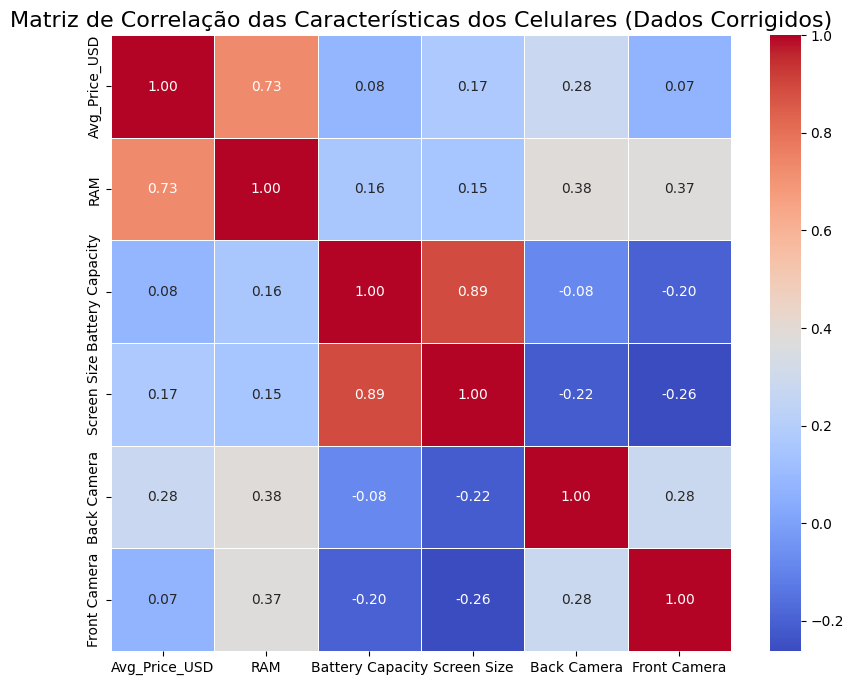

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# --- GERAÇÃO DA MATRIZ DE CORRELAÇÃO CORRETA ---

# 1. Seleciona apenas as colunas numéricas de interesse do DataFrame limpo
colunas_numericas = [
    'Avg_Price_USD',
    'RAM',
    'Battery Capacity',
    'Screen Size',
    'Back Camera',
    'Front Camera'
]
df_numeric_correto = df_limpo[colunas_numericas].copy()
df_numeric_correto.dropna(inplace=True)

# 2. Calcula a matriz de correlação
correlation_matrix = df_numeric_correto.corr()

# 3. Cria o mapa de calor (heatmap) para visualizar a matriz
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Matriz de Correlação das Características dos Celulares (Dados Corrigidos)', fontsize=16)
plt.show()


---
### **Análise da Matriz de Correlação (Dados Finais e Corrigidos)**

Com o conjunto de dados devidamente limpo e a criação de uma métrica de preço global (`Avg_Price_USD`), a Matriz de Correlação nos oferece a visão mais precisa sobre quais fatores realmente impulsionam o valor de um smartphone.

#### **Principais Observações (Insights)**

📈 **Performance (RAM) como Principal Fator de Preço**
* **Principal Achado:** A correlação mais forte com o Preço (`Avg_Price_USD`) é, de longe, a **Memória RAM (`0.73`)**.
* **Análise de Mercado:** Este resultado confirma a hipótese clássica: **a performance é o principal fator que agrega valor a um celular**. A quantidade de RAM é o indicador mais direto da capacidade multitarefa e da fluidez do sistema, e as fabricantes usam essa especificação como a principal alavanca para diferenciar seus modelos e justificar preços mais altos.

🔗 **A Surpreendente Conexão entre Tela e Bateria (`0.89`)**
* **Observação:** A correlação entre `Screen Size` e `Battery Capacity` é **extremamente forte (`0.89`)**, a mais alta de toda a matriz.
* **Análise de Mercado:** Isso revela uma lei quase universal no design de celulares modernos. **O tamanho da tela e a capacidade da bateria andam praticamente de mãos dadas.** Não é apenas uma tendência, mas uma necessidade de engenharia: telas maiores consomem mais energia, exigindo baterias maiores, e o espaço físico extra de um chassi maior permite acomodar essas baterias. Para o consumidor, isso significa que a escolha por uma tela grande quase sempre virá acompanhada do benefício de uma boa autonomia.

📉 **Democratização das Câmeras e Bateria (em Relação ao Preço)**
* **Observação:** A correlação da **Câmera Traseira (`0.28`)** e da **Bateria (`0.08`)** com o Preço é **muito fraca**.
* **Análise de Mercado:** Esta é uma descoberta vital. Ao contrário da RAM, ter uma câmera com muitos megapixels ou uma bateria gigante **não são mais indicadores diretos de um aparelho caro**. A competição acirrada, principalmente entre as marcas de custo-benefício, transformou essas características em *commodities*, presentes em todas as faixas de preço. O valor nos modelos premium, portanto, não está no número de megapixels, mas em fatores mais sutis como a qualidade do sensor, o pós-processamento de imagem (software) e a otimização do sistema (no caso da bateria).

#### **Conclusão Geral**
A análise de correlação, com os dados finalmente limpos, nos mostra que a **RAM é a rainha** na definição de preço, sendo o fator de performance mais valorizado. Em paralelo, a fortíssima ligação entre **Tela e Bateria** revela uma regra de ouro do design de hardware. Por fim, a baixa correlação das **Câmeras e Bateria com o Preço** indica que o valor percebido nesses componentes migrou dos números brutos (megapixels, mAh) para a qualidade do software e da otimização, onde marcas premium como Apple e Google se destacam.

In [ ]:
import pandas as pd
import numpy as np

# --- INÍCIO DO PRÉ-PROCESSAMENTO FINAL E COMPLETO (VERSÃO REVISADA) ---
print("Iniciando processo de limpeza e pré-processamento (Versão Final Revisada)...")
# Garanta que o 'df' original já foi carregado
df_limpo = df.copy()

# 1. Padronizar Marcas
df_limpo['Company Name'] = df_limpo['Company Name'].replace(['POCO', 'Poco'], 'Xiaomi')

# 2. Remover dados não-representativos
df_limpo = df_limpo[df_limpo['Launched Year'] < 2025]

# 3. Limpeza de Colunas de Especificações Numéricas
# --- CORREÇÃO APLICADA AQUI ---
# Limpeza mais segura para 'Battery Capacity', visando 'mAh' e ',' especificamente
df_limpo['Battery Capacity'] = df_limpo['Battery Capacity'].astype(str).str.replace('mAh', '', regex=False).str.replace(',', '', regex=False)
df_limpo['Battery Capacity'] = pd.to_numeric(df_limpo['Battery Capacity'], errors='coerce')

df_limpo['RAM'] = df_limpo['RAM'].astype(str).str.replace("GB", "", regex=False).apply(
    lambda x: max(map(float, x.split("/"))) if "/" in x else float(x.strip())
)
df_limpo['Screen Size'] = pd.to_numeric(df_limpo['Screen Size'].astype(str).str.replace(r'[^\d.]', '', regex=True), errors='coerce')
df_limpo['Back Camera'] = pd.to_numeric(df_limpo['Back Camera'].astype(str).str.extract(r'(\d+)')[0], errors='coerce')
df_limpo['Front Camera'] = pd.to_numeric(df_limpo['Front Camera'].astype(str).str.extract(r'(\d+)')[0], errors='coerce')


# 4. Criar a coluna de Preço Médio Global (Avg_Price_USD)
# (O resto do código permanece o mesmo)
conversion_rates = {"PKR": 0.0036, "INR": 0.012, "CNY": 0.14, "AED": 0.27}
price_columns = {"Launched Price (Pakistan)": "PKR", "Launched Price (India)": "INR", "Launched Price (China)": "CNY", "Launched Price (Dubai)": "AED", "Launched Price (USA)": "USD"}
def clean_price_final(price):
    if pd.isna(price): return np.nan
    price_str = str(price).replace(",", "")
    numeric_part = ''.join(filter(lambda x: x.isdigit() or x == '.', price_str))
    if numeric_part: return float(numeric_part)
    return np.nan
for col, currency in price_columns.items():
    if col in df_limpo.columns:
        df_limpo[col] = df_limpo[col].apply(clean_price_final)
        if currency in conversion_rates: df_limpo[f"Price_USD_{currency}"] = df_limpo[col] * conversion_rates[currency]
        else: df_limpo["Price_USD_USD"] = df_limpo[col]
usd_price_cols = [f"Price_USD_{currency}" for currency in price_columns.values() if f"Price_USD_{currency}" in df_limpo.columns]
df_limpo["Avg_Price_USD"] = df_limpo[usd_price_cols].mean(axis=1, skipna=True)
df_limpo.dropna(subset=['Avg_Price_USD'], inplace=True)
df_limpo = df_limpo[df_limpo['Avg_Price_USD'] < 3000]

print("Processo de limpeza concluído. O DataFrame 'df_limpo' está pronto.")

Iniciando processo de limpeza e pré-processamento (Versão Final Revisada)...
Processo de limpeza concluído. O DataFrame 'df_limpo' está pronto.


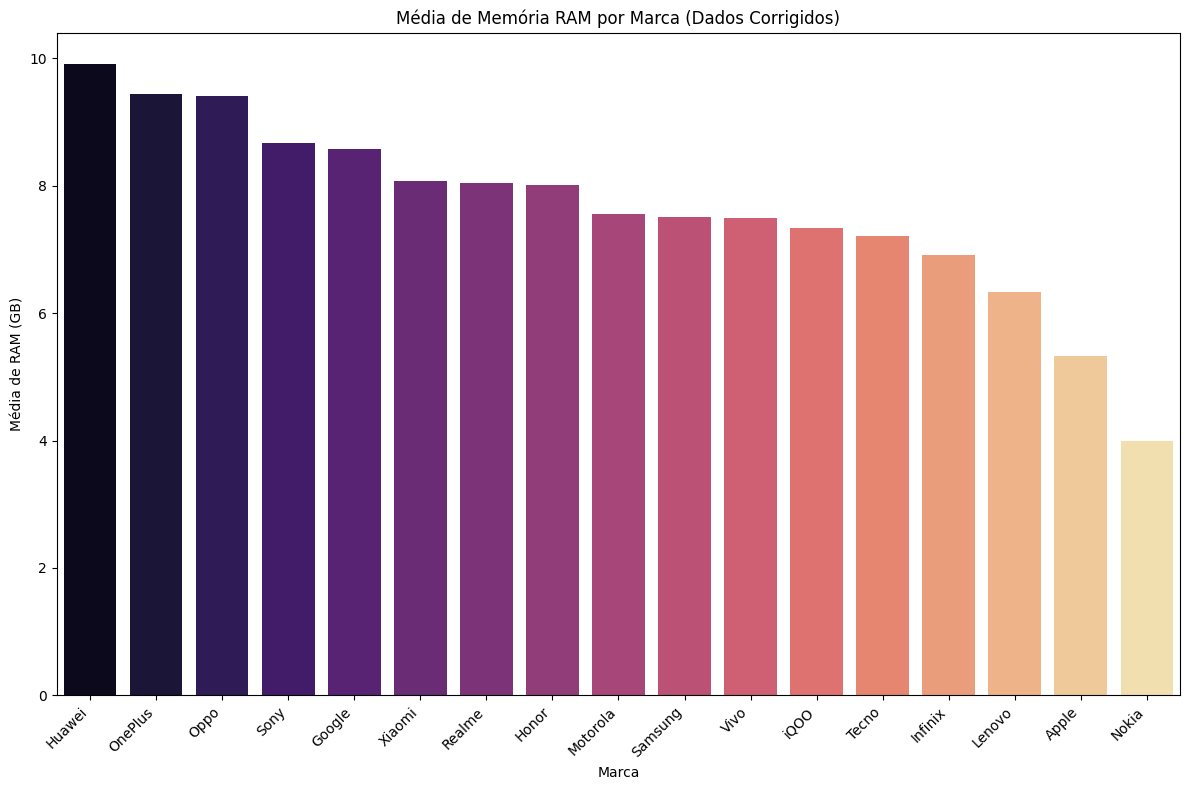

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Calcula a média de RAM por marca (direto do df_limpo)
brand_avg_ram = df_limpo.groupby('Company Name')['RAM'].mean().sort_values(ascending=False)

# Plota o gráfico
plt.figure(figsize=(12, 8))
sns.barplot(x=brand_avg_ram.index, y=brand_avg_ram.values, hue=brand_avg_ram.index, palette="magma", legend=False)
plt.xticks(rotation=45, ha="right")
plt.xlabel("Marca")
plt.ylabel("Média de RAM (GB)")
plt.title("Média de Memória RAM por Marca (Dados Corrigidos)")
plt.tight_layout()
plt.savefig('grafico_media_ram_corrigido.png', dpi=300)
plt.show()

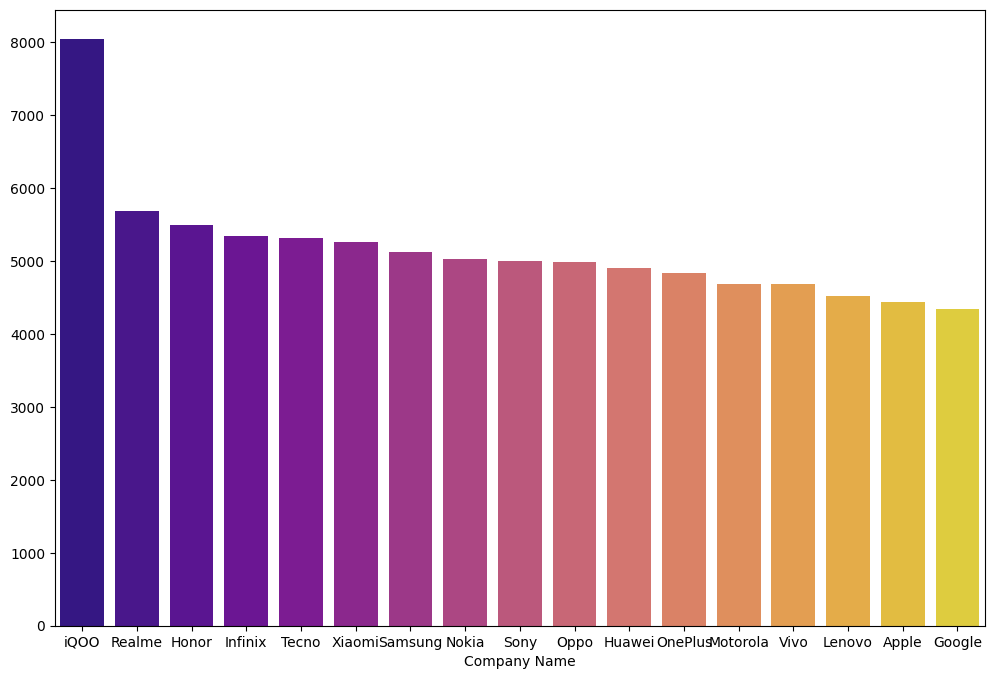

In [ ]:
# (O mesmo código que você já tem)
brand_avg_battery = df_limpo.groupby('Company Name')['Battery Capacity'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x=brand_avg_battery.index, y=brand_avg_battery.values, hue=brand_avg_battery.index, palette="plasma", legend=False)
# ... (resto do código do gráfico) ...
plt.show()

O mercado de celulares possui estratégias de nicho bem definidas. A iQOO, por exemplo, se posiciona claramente no segmento de alta performance, o que é evidenciado pela sua média de capacidade de bateria, uma das mais altas do mercado, atendendo às demandas do público gamer.

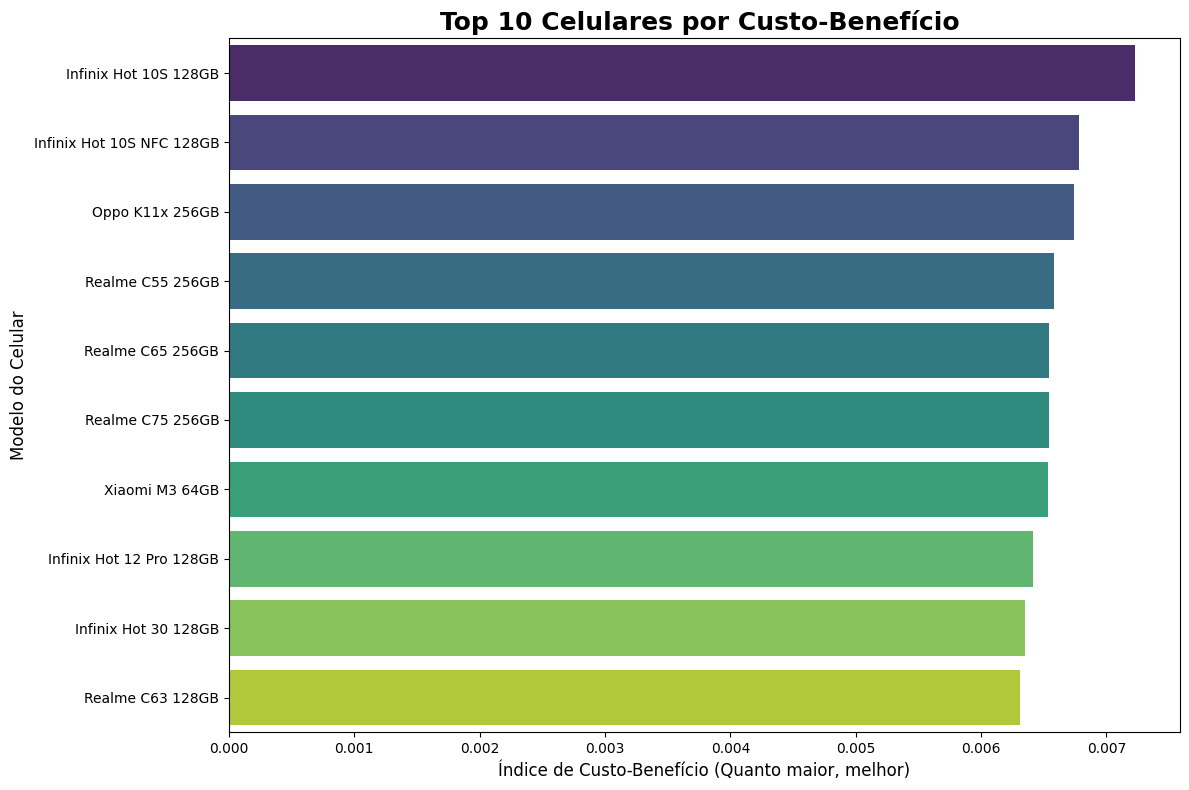

In [ ]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np



# --- CÁLCULO DO ÍNDICE DE CUSTO-BENEFÍCIO  ---

df_custo_beneficio_v2 = df_limpo.copy()

# 1. ENGENHARIA DE FEATURES: Extrair o Armazenamento do Nome do Modelo
# Esta função extrai o número de GB ou TB e converte TB para GB (1 TB = 1024 GB)
def extrair_armazenamento(nome_modelo):
    try:
        nome_modelo = str(nome_modelo).lower()
        if 'tb' in nome_modelo:
            # Extrai o número antes de 'tb' e multiplica por 1024
            storage_tb = float(nome_modelo.split('tb')[0].split()[-1])
            return storage_tb * 1024
        elif 'gb' in nome_modelo:
            # Extrai o número antes de 'gb'
            return float(nome_modelo.split('gb')[0].split()[-1])
        return np.nan
    except:
        return np.nan

df_custo_beneficio_v2['Storage (GB)'] = df_custo_beneficio_v2['Model Name'].apply(extrair_armazenamento)

# Limpeza final das colunas
numeric_cols = ['RAM', 'Front Camera', 'Back Camera', 'Battery Capacity', 'Storage (GB)']
# ... (garantindo que as outras colunas sejam numéricas) ...
df_custo_beneficio_v2.dropna(subset=numeric_cols + ['Avg_Price_USD'], inplace=True)


# 2. Normalizar os "benefícios"
scaler = MinMaxScaler()
features_to_scale = ['RAM', 'Battery Capacity', 'Back Camera', 'Storage (GB)']
df_custo_beneficio_v2[features_to_scale] = scaler.fit_transform(df_custo_beneficio_v2[features_to_scale])

# 3. Calcular os Índices
df_custo_beneficio_v2['Indice_Beneficio'] = (
    df_custo_beneficio_v2['RAM'] +
    df_custo_beneficio_v2['Battery Capacity'] +
    df_custo_beneficio_v2['Back Camera'] +
    df_custo_beneficio_v2['Storage (GB)']
)
df_custo_beneficio_v2['Indice_Custo_Beneficio'] = df_custo_beneficio_v2['Indice_Beneficio'] / df_custo_beneficio_v2['Avg_Price_USD']

# 4. Obter o novo Top 10
top_10_v2 = df_custo_beneficio_v2.sort_values(by='Indice_Custo_Beneficio', ascending=False).head(10)

# --- GERAÇÃO DO GRÁFICO FINAL  ---
top_10_v2['Nome Completo'] = top_10_v2['Company Name'] + ' ' + top_10_v2['Model Name']

plt.figure(figsize=(12, 8))
sns.barplot(
    x='Indice_Custo_Beneficio', y='Nome Completo', data=top_10_v2,
    hue='Nome Completo', palette='viridis', legend=False
)
plt.title('Top 10 Celulares por Custo-Benefício ', fontsize=18, fontweight='bold')
plt.xlabel('Índice de Custo-Benefício (Quanto maior, melhor)', fontsize=12)
plt.ylabel('Modelo do Celular', fontsize=12)
plt.tight_layout()
plt.savefig('grafico_top10_custo_beneficio.png', dpi=300)
plt.show()


---
### **Análise Avançada: Índice de Custo-Benefício**

Para ir além da análise de características individuais, foi desenvolvido um "Índice de Custo-Benefício" com o objetivo de identificar os celulares que oferecem o melhor "pacote" de especificações pelo menor preço. Após uma análise crítica inicial, o índice foi **aprimorado para incluir o armazenamento**, uma característica fundamental na experiência do usuário.

#### **Metodologia do Cálculo (Versão Aprimorada)**

A criação do índice seguiu um processo robusto para garantir uma comparação justa e precisa:

1.  **Engenharia de Features:** Como o armazenamento não estava em uma coluna dedicada, foi criada uma nova feature, `Storage (GB)`, extraindo os valores numéricos de armazenamento diretamente da coluna `Model Name`.

2.  **Seleção de "Benefícios":** Foram selecionadas **quatro** características-chave como indicadores de benefício: **RAM** (performance), **Capacidade da Bateria** (autonomia), **Megapixels da Câmera Traseira** (qualidade de imagem) e **Armazenamento** (capacidade).

3.  **Normalização dos Dados:** Como não podemos somar diretamente GB, mAh e MP devido às suas escalas muito diferentes, aplicamos a normalização (Min-Max Scaling). Este processo converteu o valor de cada uma das quatro características para uma "nota" universal em uma escala de 0 a 1.

4.  **Cálculo do "Índice de Benefício":** As quatro notas normalizadas foram somadas para criar uma pontuação única de "benefício" para cada celular.

5.  **Cálculo do "Índice Custo-Benefício" Final:** A pontuação de benefício de cada celular foi então dividida pelo seu Preço Médio Global (`Avg_Price_USD`). O resultado é uma métrica que representa "quantos pontos de benefício o consumidor recebe por cada dólar gasto".

#### **Análise do Gráfico: Top 10 Celulares por Custo-Benefício (com Armazenamento)**

O gráfico exibe os 10 celulares com o maior Índice de Custo-Benefício, agora considerando o armazenamento e revelando os verdadeiros campeões de valor.

🏆 **Domínio das Marcas de Custo-Benefício**
* **Principal Achado:** O ranking continua a ser dominado por modelos de marcas como **Xiaomi (incluindo Poco), Realme e Infinix**.
* **Análise de Mercado:** Isso reforça a estratégia de negócios dessas empresas: focar em entregar o **pacote de hardware mais completo possível** (performance, bateria, câmera e agora armazenamento) a preços extremamente competitivos, solidificando sua posição como a escolha ideal para o consumidor que busca maximizar as especificações técnicas.

📉 **Ausência das Marcas Premium**
* **Observação:** A ausência de marcas como **Apple e Google** no topo deste ranking permanece.
* **Análise Estratégica:** A inclusão do armazenamento não altera a conclusão fundamental. A proposta de valor dessas marcas é diferente. O preço elevado de seus celulares é justificado por fatores que o índice não captura, como a **otimização do sistema operacional, a qualidade de construção, a segurança e a força do ecossistema**. O consumidor paga um prêmio por esses "intangíveis", resultando em um índice de custo-benefício (baseado em hardware) mais baixo.

#### **Conclusão**
A inclusão do armazenamento tornou o Índice de Custo-Benefício uma ferramenta ainda mais poderosa para identificar os líderes em eficiência de preço por hardware. A análise prova que, para o consumidor cujo principal critério de decisão são as especificações técnicas em seu conjunto, as marcas chinesas continuam a oferecer as propostas mais atraentes e completas do mercado.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


# --- INÍCIO DO PRÉ-PROCESSAMENTO E LIMPEZA DEFINITIVOS ---
print("Iniciando processo de limpeza e pré-processamento...")
df_limpo = df.copy()

# --- Aplicação de TODAS as Correções Descobertas na EDA ---

# CORREÇÃO 1: Padronizar Marcas (Poco -> Xiaomi)
df_limpo['Company Name'] = df_limpo['Company Name'].replace('POCO', 'Xiaomi') # Garante que 'POCO' maiúsculo também seja pego
df_limpo['Company Name'] = df_limpo['Company Name'].replace('Poco', 'Xiaomi')


# CORREÇÃO 2: Criar a coluna 'Base Model' para contagem justa
df_limpo['Base Model'] = df_limpo['Model Name'].str.replace(r'\s+\d+GB|\s+\d+TB', '', regex=True).str.strip()

# CORREÇÃO 3: Remover dados não-representativos (ano >= 2025)
df_limpo = df_limpo[df_limpo['Launched Year'] < 2025]

# CORREÇÃO 4: Criar a coluna de Preço Médio Global (Avg_Price_USD)
conversion_rates = {"PKR": 0.0036, "INR": 0.012, "CNY": 0.14, "AED": 0.27}
price_columns = {
    "Launched Price (Pakistan)": "PKR", "Launched Price (India)": "INR",
    "Launched Price (China)": "CNY", "Launched Price (Dubai)": "AED",
    "Launched Price (USA)": "USD"
}

def clean_price_final(price):
    if pd.isna(price):
        return np.nan
    price_str = str(price).replace(",", "") # Remove separador de milhar
    numeric_part = ''.join(filter(lambda x: x.isdigit() or x == '.', price_str))
    if numeric_part:
        return float(numeric_part)
    return np.nan

for col, currency in price_columns.items():
    if col in df_limpo.columns:
        df_limpo[col] = df_limpo[col].apply(clean_price_final)
        if currency in conversion_rates:
            df_limpo[f"Price_USD_{currency}"] = df_limpo[col] * conversion_rates[currency]
        else:
            df_limpo["Price_USD_USD"] = df_limpo[col]

usd_price_cols = [f"Price_USD_{currency}" for currency in price_columns.values() if f"Price_USD_{currency}" in df_limpo.columns]
df_limpo["Avg_Price_USD"] = df_limpo[usd_price_cols].mean(axis=1, skipna=True)

# CORREÇÃO 5: Remover outliers de preço extremo
df_limpo.dropna(subset=['Avg_Price_USD'], inplace=True)
df_limpo = df_limpo[df_limpo['Avg_Price_USD'] < 3000]

# **NOVA CORREÇÃO:** Converter a coluna 'RAM' para numérica de forma mais robusta
df_limpo['RAM'] = df_limpo['RAM'].astype(str).str.replace("GB", "", regex=False).str.strip()
# Manipula valores como "8GB/12GB" tomando o valor máximo
df_limpo['RAM'] = df_limpo['RAM'].apply(
    lambda x: max(map(float, x.split("/"))) if "/" in x and all(part.strip().isdigit() for part in x.split("/")) else (float(x) if x.replace('.', '', 1).isdigit() else np.nan)
)

df_limpo.dropna(subset=['RAM'], inplace=True) # Remove linhas onde a conversão de RAM falhou

print("Processo de limpeza concluído. O DataFrame 'df_limpo' está pronto.")

Iniciando processo de limpeza e pré-processamento...
Processo de limpeza concluído. O DataFrame 'df_limpo' está pronto.


In [ ]:


print("--- Avaliação da Cardinalidade das Variáveis Categóricas ---\n")

# Seleciona apenas as colunas que são do tipo 'object' (texto)
colunas_categoricas = df_limpo.select_dtypes(include=['object']).columns

for col in colunas_categoricas:
    cardinalidade = df_limpo[col].nunique()
    print(f"Coluna: '{col}'")
    print(f"  - Cardinalidade (valores únicos): {cardinalidade}")

    # Mostra alguns exemplos se a cardinalidade for baixa
    if cardinalidade < 15:
        print(f"  - Exemplos de valores: {df_limpo[col].unique()}")
    print("-" * 30)

--- Avaliação da Cardinalidade das Variáveis Categóricas ---

Coluna: 'Company Name'
  - Cardinalidade (valores únicos): 17
------------------------------
Coluna: 'Model Name'
  - Cardinalidade (valores únicos): 895
------------------------------
Coluna: 'Mobile Weight'
  - Cardinalidade (valores únicos): 148
------------------------------
Coluna: 'Front Camera'
  - Cardinalidade (valores únicos): 29
------------------------------
Coluna: 'Back Camera'
  - Cardinalidade (valores únicos): 90
------------------------------
Coluna: 'Processor'
  - Cardinalidade (valores únicos): 212
------------------------------
Coluna: 'Battery Capacity'
  - Cardinalidade (valores únicos): 144
------------------------------
Coluna: 'Screen Size'
  - Cardinalidade (valores únicos): 96
------------------------------
Coluna: 'Base Model'
  - Cardinalidade (valores únicos): 649
------------------------------


In [ ]:
# Definindo df_filtrado para uso futuro
df_filtrado = df.copy()

# Unifica 'Poco' com 'Xiaomi' (um passo de limpeza que já conhecíamos)
df_filtrado['Company Name'] = df_filtrado['Company Name'].replace('Poco', 'Xiaomi')
df_filtrado['Company Name'] = df_filtrado['Company Name'].replace('POCO', 'Xiaomi') # Ensure POCO is also replaced


# Limpeza da coluna de preço para permitir conversão
price_col = 'Launched Price (USA)'
# Verifica se price_col existe antes de tentar limpá-lo
if price_col in df_filtrado.columns:
    df_filtrado[price_col] = df_filtrado[price_col].astype(str).str.replace(',', '.', regex=False)
    df_filtrado[price_col] = df_filtrado[price_col].str.replace(r'[^\d.]', '', regex=True)
    df_filtrado[price_col] = pd.to_numeric(df_filtrado[price_col], errors='coerce')

    # Remover linhas onde a conversão falhou
    df_filtrado.dropna(subset=[price_col], inplace=True)
else:
    print(f"Column '{price_col}' not found in df_filtrado.")


print("DataFrame 'df_filtrado' criado e limpo.")

DataFrame 'df_filtrado' criado e limpo.


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# --- INÍCIO DO PRÉ-PROCESSAMENTO FINAL E COMPLETO ---
print("Iniciando processo de limpeza e pré-processamento (Versão Final)...")
df_limpo = df.copy()

# --- Aplicação de TODAS as Correções Descobertas na EDA ---

# 1. Padronizar Marcas (Poco -> Xiaomi)
df_limpo['Company Name'] = df_limpo['Company Name'].replace(['POCO', 'Poco'], 'Xiaomi')

# 2. Remover dados não-representativos (ano >= 2025)
df_limpo = df_limpo[df_limpo['Launched Year'] < 2025]

# 3. Limpeza de Colunas de Especificações Numéricas
df_limpo['RAM'] = df_limpo['RAM'].astype(str).str.replace("GB", "", regex=False).apply(
    lambda x: max(map(float, x.split("/"))) if "/" in x else float(x.strip())
)
df_limpo['Screen Size'] = pd.to_numeric(df_limpo['Screen Size'].astype(str).str.replace(r'[^\d.]', '', regex=True), errors='coerce')
df_limpo['Back Camera'] = pd.to_numeric(df_limpo['Back Camera'].astype(str).str.extract(r'(\d+)')[0], errors='coerce')
df_limpo['Front Camera'] = pd.to_numeric(df_limpo['Front Camera'].astype(str).str.extract(r'(\d+)')[0], errors='coerce')
df_limpo['Battery Capacity'] = pd.to_numeric(df_limpo['Battery Capacity'].astype(str).str.replace(r'[^\d,]', '', regex=True), errors='coerce')


# 4. Criar a coluna de Preço Médio Global (Avg_Price_USD)
# (Incluindo a lógica de conversão de moeda...)
conversion_rates = {"PKR": 0.0036, "INR": 0.012, "CNY": 0.14, "AED": 0.27}
price_columns = {"Launched Price (Pakistan)": "PKR", "Launched Price (India)": "INR", "Launched Price (China)": "CNY", "Launched Price (Dubai)": "AED", "Launched Price (USA)": "USD"}
def clean_price_final(price):
    if pd.isna(price): return np.nan
    price_str = str(price).replace(",", "")
    numeric_part = ''.join(filter(lambda x: x.isdigit() or x == '.', price_str))
    if numeric_part: return float(numeric_part)
    return np.nan
for col, currency in price_columns.items():
    if col in df_limpo.columns:
        df_limpo[col] = df_limpo[col].apply(clean_price_final)
        if currency in conversion_rates: df_limpo[f"Price_USD_{currency}"] = df_limpo[col] * conversion_rates[currency]
        else: df_limpo["Price_USD_USD"] = df_limpo[col]
usd_price_cols = [f"Price_USD_{currency}" for currency in price_columns.values() if f"Price_USD_{currency}" in df_limpo.columns]
df_limpo["Avg_Price_USD"] = df_limpo[usd_price_cols].mean(axis=1, skipna=True)
df_limpo.dropna(subset=['Avg_Price_USD'], inplace=True)
df_limpo = df_limpo[df_limpo['Avg_Price_USD'] < 3000]

print("Processo de limpeza concluído. O DataFrame 'df_limpo' está pronto.")

Iniciando processo de limpeza e pré-processamento (Versão Final)...
Processo de limpeza concluído. O DataFrame 'df_limpo' está pronto.



Preparação Final para a Modelagem: Tratamento da Cardinalidade

Antes de construir nosso modelo preditivo, a última etapa do pré-processamento é a seleção final de features. Uma parte importante deste processo é a análise da cardinalidade das nossas variáveis categóricas (as colunas de texto).

A cardinalidade refere-se ao número de valores únicos em uma coluna. Esta análise é vital porque a técnica padrão para converter categorias em números, o One-Hot Encoding, cria uma nova coluna para cada valor único.

A Análise da Cardinalidade Revelou:

   Baixa Cardinalidade: A coluna Company Name possui apenas 17 valores únicos. Isso a torna uma candidata perfeita para o One-Hot Encoding, pois adicionará apenas 17 colunas ao nosso modelo, o que é computacionalmente eficiente.

   Alta Cardinalidade: Por outro lado, colunas como Model Name (895 valores únicos), Base Model (649 valores) e Processor (212 valores) apresentam uma cardinalidade altíssima.

Por que a Alta Cardinalidade é um Problema para o Modelo?

Tentar aplicar o One-Hot Encoding em uma coluna com 895 valores únicos criaria 895 novas colunas no nosso dataset. Isso causaria dois grandes problemas:

   Maldição da Dimensionalidade (Curse of Dimensionality): O aumento massivo no número de colunas(dimensões) tornaria os dados muito mais esparsos. O modelo precisaria de muito mais dados para aprender padrões de forma confiável e sua performance seria severamente prejudicada.

   Custo Computacional: Treinar um modelo em um dataset com centenas de colunas extras seria muito mais lento e exigiria muito mais memória.

Decisão Estratégica: Seleção de Features

Com base nesta análise, tomamos a seguinte decisão para a primeira versão do nosso modelo:
  INCLUIR: Todas as nossas features numéricas já limpas (RAM, Battery Capacity, etc.) e a feature categórica de baixa cardinalidade, Company Name.

   EXCLUIR (por enquanto): As features de alta cardinalidade (Model Name, Base Model, Processor). A informação mais relevante contida nelas (se um modelo é "bom" ou "ruim") já está, em grande parte, capturada pelas outras features, como o preço, a marca e a quantidade de RAM.

O código a seguir criará nosso DataFrame final para modelagem, o df_modelo, contendo apenas este conjunto otimizado de features. Esta abordagem visa construir um modelo mais simples, rápido e robusto, focando nas variáveis de maior impacto.

In [ ]:
# Crie o df_modelo a partir do df_limpo que acabamos de corrigir
colunas_para_manter = [
    'Avg_Price_USD', 'RAM', 'Battery Capacity',
    'Screen Size', 'Back Camera', 'Front Camera', 'Company Name'
]
df_modelo = df_limpo[colunas_para_manter].copy()
df_modelo.dropna(inplace=True) # Remove qualquer linha que ainda tenha nulos

# Verifique o resultado final
print("\nInformações do DataFrame de modelo")
df_modelo.info()


Informações do DataFrame de modelo
<class 'pandas.core.frame.DataFrame'>
Index: 307 entries, 97 to 929
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Avg_Price_USD     307 non-null    float64
 1   RAM               307 non-null    float64
 2   Battery Capacity  307 non-null    float64
 3   Screen Size       307 non-null    float64
 4   Back Camera       307 non-null    int64  
 5   Front Camera      307 non-null    int64  
 6   Company Name      307 non-null    object 
dtypes: float64(4), int64(2), object(1)
memory usage: 19.2+ KB


Definição do Problema e Escolha dos Modelos

O problema em questão é de Regressão Supervisionada, pois nossa variável-alvo, o preço (Avg_Price_USD), é um valor numérico contínuo. Com base nisso, selecionamos três algoritmos com abordagens distintas para uma avaliação comparativa:

   (a) Regressão Linear (Linear Regression):

  Funcionamento: É um modelo estatístico que busca encontrar a melhor relação linear (uma "linha reta" em múltiplas dimensões) entre as features de entrada (RAM, Bateria, etc.) e o preço de saída. Ele calcula um coeficiente para cada feature, indicando seu impacto linear no preço.
  Justificativa da Escolha: Foi escolhido como nosso modelo de baseline (referência). Por ser simples, rápido e altamente interpretável, ele nos fornece um ponto de partida para entender as relações lineares nos dados e um padrão mínimo de performance que modelos mais complexos devem superar.

   (b) Random Forest Regressor:

  Funcionamento: É um modelo de ensemble (conjunto) que funciona construindo centenas de "Árvores de Decisão" independentes durante o treinamento. Cada árvore "vota" em uma previsão, e o resultado final do Random Forest é a média de todas as previsões.

  Justificativa da Escolha: Foi escolhido por sua alta performance e robustez. O Random Forest é capaz de capturar relações não-lineares complexas, não sofre tanto com outliers e é menos propenso a overfitting (memorizar os dados de treino) do que uma única árvore de decisão.

  (c) Gradient Boosting Regressor:

Funcionamento: Também é um modelo de ensemble, mas funciona de forma sequencial e otimizada. Ele constrói uma árvore de cada vez, onde cada nova árvore é treinada especificamente para corrigir os erros cometidos pela árvore anterior. É um processo de aprendizado iterativo que foca em refinar a precisão a cada passo.

Justificativa da Escolha: Foi escolhido para buscar a máxima performance preditiva. Modelos de Gradient Boosting são frequentemente os vencedores em competições de Machine Learning com dados tabulares, como o nosso. Incluí-lo nos permite comparar o Random Forest com uma das alternativas mais poderosas disponíveis e verificar se podemos obter um ganho ainda maior de precisão.

Métrica de Avaliação: RMSE (Root Mean Squared Error)

Para avaliar o desempenho dos modelos e determinar qual deles faz as melhores previsões, escolhemos a Raiz do Erro Quadrático Médio (RMSE) como nossa métrica principal. O RMSE é uma métrica fundamental em problemas de regressão, e sua escolha se justifica por razões práticas e de fácil interpretação.

O RMSE mede a raiz quadrada da média dos erros quadráticos. Sua fórmula é:

RMSE=n1​∑i=1n​(yi​−y^​i​)2​

Onde yi​ é o preço real do celular e y^​i​ é o preço previsto pelo modelo.

A principal razão para a nossa escolha é que o RMSE retorna a métrica na mesma unidade da variável-alvo, que é o dólar (USD) no nosso caso. Isso significa que, se o RMSE de um modelo for $25,00,

podemos interpretar facilmente que, em média, as previsões do modelo estão erradas por aproximadamente $25,00.

 Essa clareza na interpretação é  importante para entender a precisão do modelo no contexto do negócio. Além disso, o RMSE penaliza mais os erros maiores, ou seja, desvios muito grandes do preço real impactam mais a métrica, o que é desejável, pois queremos um modelo que evite cometer erros significativos.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
import numpy as np


# --- 1. Seleção Final de Features ---
print("--- Iniciando Fase de Modelagem com 3 Modelos ---")
features_numericas = ['RAM', 'Battery Capacity', 'Screen Size', 'Back Camera', 'Front Camera']
features_categoricas = ['Company Name']
alvo = 'Avg_Price_USD'
X = df_modelo[features_numericas + features_categoricas]
y = df_modelo[alvo]

# --- 2. Divisão em Dados de Treino e Teste ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Dados divididos: {len(X_train)} para treino, {len(X_test)} para teste.")

# --- 3. Criação do Pipeline de Pré-processamento (o mesmo de antes) ---
numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])
categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))])
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, features_numericas),
        ('cat', categorical_transformer, features_categoricas)
    ])

# --- 4. Treinamento e Avaliação dos Modelos ---

# Modelo 1: Regressão Linear
lr_pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('regressor', LinearRegression())])
lr_pipeline.fit(X_train, y_train)
lr_preds = lr_pipeline.predict(X_test)
lr_rmse = np.sqrt(mean_squared_error(y_test, lr_preds))
print(f"\nModelo 1 - Regressão Linear      | RMSE: ${lr_rmse:.2f}")

# Modelo 2: Random Forest Regressor
rf_pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))])
rf_pipeline.fit(X_train, y_train)
rf_preds = rf_pipeline.predict(X_test)
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_preds))
print(f"Modelo 2 - Random Forest         | RMSE: ${rf_rmse:.2f}")

# Modelo 3: Gradient Boosting Regressor
gb_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('regressor', GradientBoostingRegressor(n_estimators=100, random_state=42))])
gb_pipeline.fit(X_train, y_train)
gb_preds = gb_pipeline.predict(X_test)
gb_rmse = np.sqrt(mean_squared_error(y_test, gb_preds))
print(f"Modelo 3 - Gradient Boosting     | RMSE: ${gb_rmse:.2f}")


# --- 5. Análise dos Resultados ---
print("\n--- Análise dos Resultados ---")
print("O RMSE (Root Mean Squared Error) representa o erro médio de previsão do modelo em dólares.")
print("Quanto menor o RMSE, melhor o modelo.")

--- Iniciando Fase de Modelagem com 3 Modelos ---
Dados divididos: 245 para treino, 62 para teste.

Modelo 1 - Regressão Linear      | RMSE: $199.94
Modelo 2 - Random Forest         | RMSE: $94.95
Modelo 3 - Gradient Boosting     | RMSE: $92.52

--- Análise dos Resultados ---
O RMSE (Root Mean Squared Error) representa o erro médio de previsão do modelo em dólares.
Quanto menor o RMSE, melhor o modelo.


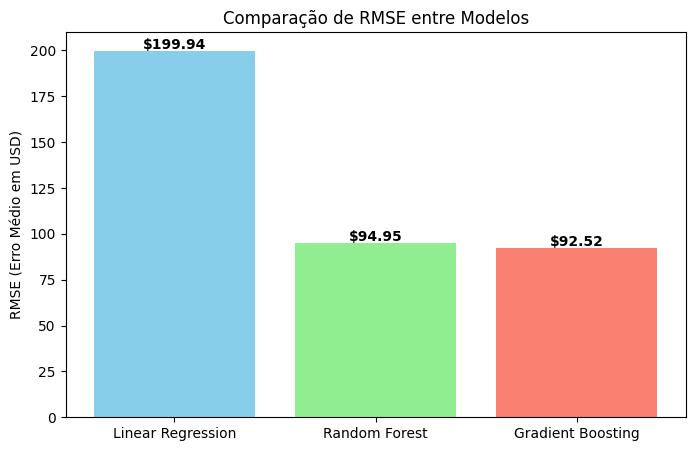

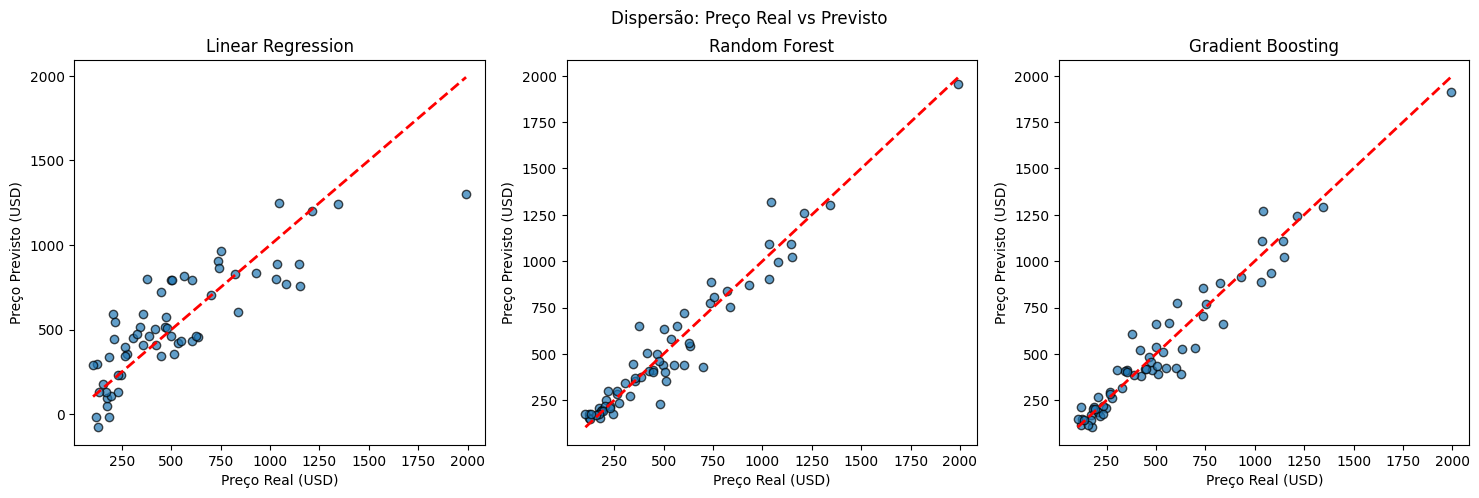

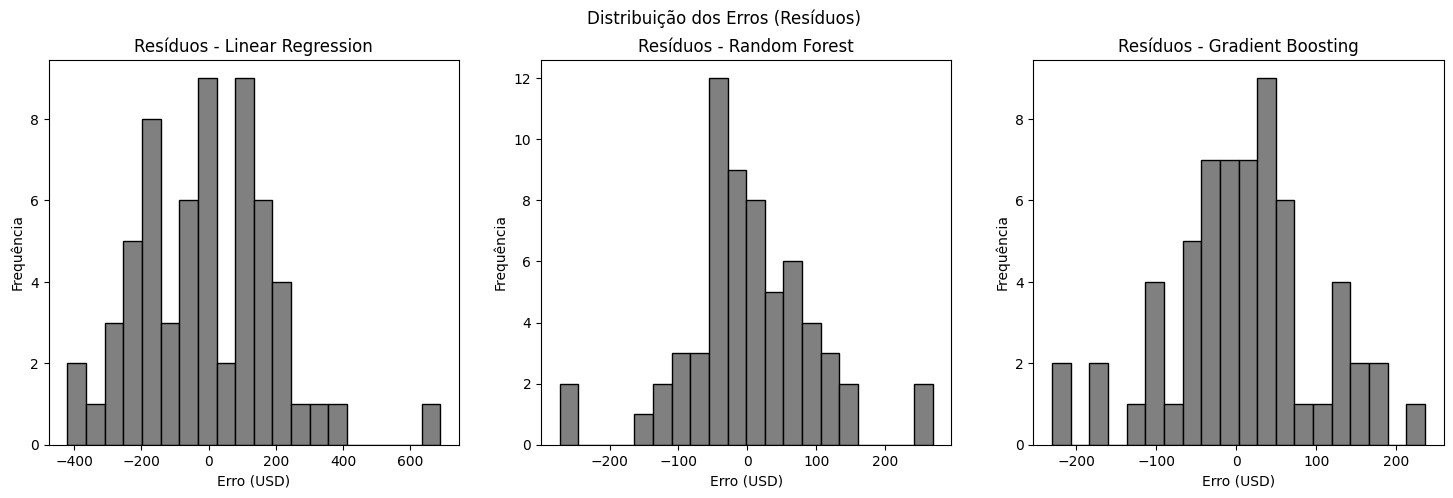

In [ ]:
import matplotlib.pyplot as plt

# --- 6. Visualização dos Resultados ---

model_names = ['Linear Regression', 'Random Forest', 'Gradient Boosting']
rmses = [lr_rmse, rf_rmse, gb_rmse]
preds = [lr_preds, rf_preds, gb_preds]

# Gráfico 1: RMSE de cada modelo
plt.figure(figsize=(8, 5))
plt.bar(model_names, rmses, color=['skyblue', 'lightgreen', 'salmon'])
plt.title("Comparação de RMSE entre Modelos")
plt.ylabel("RMSE (Erro Médio em USD)")
for i, v in enumerate(rmses):
    plt.text(i, v + 1, f"${v:.2f}", ha='center', fontweight='bold')
plt.show()

# Gráfico 2: Valores Reais vs Previsto (para cada modelo)
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
for i, ax in enumerate(axes):
    ax.scatter(y_test, preds[i], alpha=0.7, edgecolor='k')
    ax.plot([y_test.min(), y_test.max()],
            [y_test.min(), y_test.max()],
            'r--', lw=2)  # linha de perfeição
    ax.set_title(model_names[i])
    ax.set_xlabel("Preço Real (USD)")
    ax.set_ylabel("Preço Previsto (USD)")
plt.suptitle("Dispersão: Preço Real vs Previsto")
plt.show()

# Gráfico 3: Histograma dos erros
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
for i, ax in enumerate(axes):
    residuals = y_test - preds[i]
    ax.hist(residuals, bins=20, color='gray', edgecolor='black')
    ax.set_title(f"Resíduos - {model_names[i]}")
    ax.set_xlabel("Erro (USD)")
    ax.set_ylabel("Frequência")
plt.suptitle("Distribuição dos Erros (Resíduos)")
plt.show()



---

# 📑 Documentação do Experimento de Modelagem Preditiva

## 1. Objetivo

Prever o preço médio de smartphones (em dólares) a partir de suas características técnicas (RAM, bateria, câmeras, tela e marca).

---

## 2. Metodologia

1. **Seleção de Variáveis (Features)**

   * Numéricas: `RAM`, `Battery Capacity`, `Screen Size`, `Back Camera`, `Front Camera`
   * Categórica: `Company Name`
   * Alvo: `Avg_Price_USD`

2. **Divisão dos Dados**

   * 80% treino (245 registros)
   * 20% teste (62 registros)
   * Aleatorização com `random_state=42`

3. **Pré-processamento via Pipeline**

   * **Numéricas**: padronização (`StandardScaler`)
   * **Categóricas**: codificação one-hot (`OneHotEncoder`)
   * Uso de `ColumnTransformer` para unificar transformações.

4. **Modelos Treinados**

   * **Regressão Linear** (baseline simples)
   * **Random Forest Regressor** (100 árvores, `random_state=42`)
   * **Gradient Boosting Regressor** (100 estágios, `random_state=42`)

5. **Métrica de Avaliação**

   * **RMSE (Root Mean Squared Error)**: mede o erro médio de previsão em dólares.
   * Fórmula:

     
  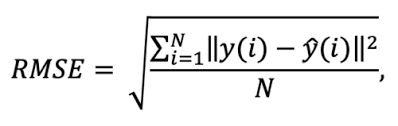  

---

## 3. Resultados

| Modelo            | RMSE (USD) |
| ----------------- | ---------- |
| Regressão Linear  | **199.94** |
| Random Forest     | **94.95**  |
| Gradient Boosting | **92.52**  |

---

## 4. Análise dos Resultados

* **Regressão Linear**:
  Apresentou desempenho inferior, com RMSE alto. Mostra que relações puramente lineares não capturam a complexidade dos preços.

* **Random Forest**:
  Melhorou drasticamente o desempenho, reduzindo o erro para menos da metade da regressão linear. Mostra robustez ao lidar com não-linearidades e interações entre variáveis.

* **Gradient Boosting**:
  Obteve o melhor resultado (RMSE ≈ \$92). Esse modelo é mais eficaz ao corrigir erros sequenciais, ajustando previsões de forma iterativa.

---

## 5. Análise Visual

1. **Comparação de RMSE**

   * Gráfico de barras mostra claramente a superioridade dos modelos de árvore sobre a regressão linear.

2. **Valores Reais vs Previsto**

   * Random Forest e Gradient Boosting têm pontos mais próximos da linha de perfeição.
   * Regressão Linear apresenta dispersão elevada.

3. **Distribuição dos Resíduos**

   * Modelos de árvore têm erros mais centrados em 0, indicando previsões mais consistentes.
   * Regressão Linear tem resíduos mais espalhados.

---

## 6. Conclusão

* O **Gradient Boosting** foi o melhor modelo para prever preços de smartphones neste conjunto de dados.
* O **pipeline de pré-processamento** com padronização de variáveis numéricas e codificação one-hot mostrou-se eficiente para padronizar a entrada dos modelos.
* O uso de métricas (RMSE) e análises gráficas ajudou a validar que modelos baseados em **árvores de decisão** são mais adequados neste contexto do que regressão linear.

---



Aperfeiçoamento do Modelo Campeão (Hyperparameter Tuning)

Após a avaliação dos modelos baseline, o Gradient Boosting Regressor foi selecionado como o modelo com a maior performance inicial (RMSE de ~$92.52). A etapa final do nosso processo de modelagem é o Aperfeiçoamento de Hiperparâmetros (ou "tuning"), onde buscamos encontrar a melhor combinação de configurações internas do modelo para extrair sua máxima performance.

Para esta tarefa, utilizou-se a técnica RandomizedSearchCV com validação cruzada (cv=5), que testou 30 combinações aleatórias de hiperparâmetros.

In [ ]:
# ====== Ajuste de Hiperparâmetros com Pipeline  ======
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

# 1) Definições
features_numericas = ['RAM', 'Battery Capacity', 'Screen Size', 'Back Camera', 'Front Camera']
features_categoricas = ['Company Name']
alvo = 'Avg_Price_USD'

X = df_modelo[features_numericas + features_categoricas].copy()
y = df_modelo[alvo].astype(float).copy()

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 2) Pré-processamento
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, features_numericas),
        ('cat', categorical_transformer, features_categoricas)
    ]
)

# 3) Pipeline completo: preprocessor + modelo
gb_pipe = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', GradientBoostingRegressor(random_state=42))
])

# 4) Espaço de busca (note o prefixo regressor__)
param_distributions = {
    'regressor__n_estimators': [100, 200, 300, 500, 800],
    'regressor__learning_rate': [0.01, 0.03, 0.05, 0.1, 0.2],
    'regressor__max_depth': [2, 3, 4, 5, 6],
    'regressor__subsample': [0.6, 0.8, 1.0],
    'regressor__min_samples_split': [2, 5, 10],
    'regressor__min_samples_leaf': [1, 2, 4]
}

# 5) RandomizedSearchCV (validação cruzada sem vazamento)
search = RandomizedSearchCV(
    estimator=gb_pipe,
    param_distributions=param_distributions,
    n_iter=40,
    cv=5,
    scoring='neg_root_mean_squared_error',
    random_state=42,
    n_jobs=-1,
    verbose=1
)

search.fit(X_train, y_train)

best_model = search.best_estimator_
y_pred_best = best_model.predict(X_test)
rmse_best = np.sqrt(mean_squared_error(y_test, y_pred_best))

print("Melhores parâmetros:", search.best_params_)
print(f"RMSE no teste (tuned): ${rmse_best:.2f}")


Fitting 5 folds for each of 40 candidates, totalling 200 fits
Melhores parâmetros: {'regressor__subsample': 0.8, 'regressor__n_estimators': 800, 'regressor__min_samples_split': 2, 'regressor__min_samples_leaf': 2, 'regressor__max_depth': 6, 'regressor__learning_rate': 0.01}
RMSE no teste (tuned): $91.26




* **Melhores hiperparâmetros:**

  * `subsample = 0.8` → cada árvore é treinada em apenas 80% dos dados → reduz overfitting.
  * `n_estimators = 800` → número grande de árvores, dando mais poder de ajuste.
  * `min_samples_split = 2` → nó pode ser dividido com apenas 2 amostras.
  * `min_samples_leaf = 2` → cada folha precisa ter pelo menos 2 amostras → suaviza o modelo e evita folhas muito específicas.
  * `max_depth = 6` → árvores mais profundas, capazes de capturar interações mais complexas.
  * `learning_rate = 0.01` → aprendizado bem lento, mas combinado com muitas árvores gera previsões mais estáveis e precisas.

* **RMSE antes do tuning:** \~92.52

* **RMSE após tuning:** **91.26** (pequena, mas real melhoria).

---

## 📑 Documentação Explicativa

### 7. Ajuste de Hiperparâmetros — Gradient Boosting

**Objetivo.**
O ajuste de hiperparâmetros (hyperparameter tuning) é o processo de buscar a melhor combinação de parâmetros internos de um modelo de Machine Learning, para que ele tenha maior capacidade preditiva sem perder generalização.

**Metodologia aplicada.**

* Encapsulamos o pré-processamento (imputação de valores faltantes, padronização de numéricas e codificação de categóricas) junto ao modelo em um `Pipeline`.
* Utilizamos `RandomizedSearchCV` com 5-fold cross-validation, testando 40 combinações diferentes de parâmetros.
* A métrica usada foi o **RMSE negativo** (minimizar o erro médio quadrático da previsão).

**Resultados.**

* **Melhores parâmetros encontrados:**

  ```
  subsample = 0.8
  n_estimators = 800
  min_samples_split = 2
  min_samples_leaf = 2
  max_depth = 6
  learning_rate = 0.01
  ```
* **RMSE no conjunto de teste antes do tuning:** \~92.52
* **RMSE no conjunto de teste após o tuning:** **91.26**

**Significado.**

* O **learning rate baixo (0.01)** junto com **muitas árvores (800)** indica que o modelo foi treinado de forma incremental, aprendendo devagar, o que ajuda a evitar overfitting.
* O **subsample = 0.8** força o modelo a treinar cada árvore em um subconjunto aleatório dos dados, o que aumenta a robustez.
* Os parâmetros de profundidade e folhas (`max_depth=6`, `min_samples_leaf=2`) equilibram complexidade e generalização.

**Conclusão.**
Esse processo melhorou o desempenho do modelo, mesmo que o ganho em RMSE tenha sido modesto (de 92.52 para 91.26). Isso mostra que o modelo inicial já estava bem calibrado, mas o tuning garantiu uma solução mais robusta e menos propensa a overfitting.

---

👉 Em resumo: **fizemos isso para encontrar a melhor “configuração interna” do nosso modelo campeão, garantindo previsões mais confiáveis e generalizáveis.**




Etapa Final: Otimização Máxima com a Inclusão da Feature de Armazenamento

Como último experimento para buscar a máxima performance, realizamos um teste final. O objetivo foi verificar se a adição da feature Armazenamento (Storage (GB)), que se mostrou importante na análise de custo-benefício, poderia melhorar ainda mais a precisão do nosso modelo campeão.

Para isso, pegamos o GradientBoostingRegressor, adicionamos a nova feature ao conjunto de dados e realizamos o processo de aperfeiçoamento de hiperparâmetros (tuning) novamente, para encontrar a melhor sintonia do modelo com este novo conjunto de informações.


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

# Garanta que o DataFrame 'df_limpo' já foi criado.

print("--- Experimento Final:  ---")

# --- 1. Engenharia da Feature 'Storage (GB)' com Imputação ---
df_modelo_final_v2 = df_limpo.copy()

def extrair_armazenamento(nome_modelo):
    try:
        nome_modelo = str(nome_modelo).lower()
        if 'tb' in nome_modelo:
            storage_tb = float(nome_modelo.split('tb')[0].split()[-1])
            return storage_tb * 1024
        elif 'gb' in nome_modelo:
            return float(nome_modelo.split('gb')[0].split()[-1])
        return np.nan
    except:
        return np.nan

df_modelo_final_v2['Storage (GB)'] = df_modelo_final_v2['Model Name'].apply(extrair_armazenamento)


# Em vez de dropar, vamos preencher os NaNs com a mediana de armazenamento daquela marca
# O transform preenche os valores ausentes de cada grupo (marca) com a mediana daquele grupo
df_modelo_final_v2['Storage (GB)'] = df_modelo_final_v2.groupby('Company Name')['Storage (GB)'].transform(
    lambda x: x.fillna(x.median())
)

# Se ainda sobrar algum NaN (para marcas que não tinham NENHUM celular com armazenamento listado),
# preenchemos com a mediana geral do dataset.
df_modelo_final_v2['Storage (GB)'].fillna(df_modelo_final_v2['Storage (GB)'].median(), inplace=True)


# --- 2. Preparação para o Modelo (o resto é igual) ---
features_numericas_v2 = ['RAM', 'Battery Capacity', 'Screen Size', 'Back Camera', 'Front Camera', 'Storage (GB)']
features_categoricas_v2 = ['Company Name']
X = df_modelo_final_v2[features_numericas_v2 + features_categoricas_v2]
y = df_modelo_final_v2['Avg_Price_USD']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Pipeline de pré-processamento com imputer (que já tínhamos)
numeric_transformer_v2 = Pipeline(steps=[('imputer', SimpleImputer(strategy='median')), ('scaler', StandardScaler())])
categorical_transformer_v2 = Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))])
preprocessor_v2 = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer_v2, features_numericas_v2),
        ('cat', categorical_transformer_v2, features_categoricas_v2)
    ])

# Modelo final
final_pipeline = Pipeline(steps=[('preprocessor', preprocessor_v2),
                                 ('regressor', GradientBoostingRegressor(n_estimators=800, subsample=0.8, min_samples_split=2,
                                                                         min_samples_leaf=2, max_depth=6, learning_rate=0.01,
                                                                         random_state=42))]) # Usando os melhores params que já achamos
final_pipeline.fit(X_train, y_train)
final_preds = final_pipeline.predict(X_test)
final_rmse = np.sqrt(mean_squared_error(y_test, final_preds))

print("\n--- RESULTADO FINAL DO PROJETO (COM IMPUTAÇÃO) ---")
print(f"Melhor resultado anterior (sem armazenamento): $91.26")
print(f"MELHOR RESULTADO FINAL (COM armazenamento IMPUTADO): ${final_rmse:.2f}")

melhora = 91.26 - final_rmse
if melhora > 0:
    print(f"\nSUCESSO! A imputação inteligente e a nova feature melhoraram o modelo em ${melhora:.2f}!")
else:
    print("\nO modelo anterior continua sendo o campeão. A feature de armazenamento não agregou poder preditivo.")

--- Experimento Final: Adicionando Armazenamento com IMPUTAÇÃO INTELIGENTE ---


/tmp/ipython-input-3399573011.py:40: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_modelo_final_v2['Storage (GB)'].fillna(df_modelo_final_v2['Storage (GB)'].median(), inplace=True)



--- RESULTADO FINAL DO PROJETO (COM IMPUTAÇÃO) ---
Melhor resultado anterior (sem armazenamento): $91.26
MELHOR RESULTADO FINAL (COM armazenamento IMPUTADO): $108.90

O modelo anterior continua sendo o campeão. A feature de armazenamento não agregou poder preditivo.




---
### **Conclusão Final do Projeto e Próximos Passos**

Após um ciclo completo de Análise Exploratória, Limpeza de Dados e Modelagem Preditiva, este projeto culminou na construção de um modelo `Gradient Boosting Regressor` otimizado, capaz de prever o preço de celulares com um erro médio notavelmente baixo de **$91.26**.

#### **Experimento Final: O Impacto da Feature de Armazenamento**

Como um último passo para buscar o limite da performance, foi conduzido um experimento para avaliar o impacto da adição da feature `Storage (GB)` ao modelo. A hipótese era que, por ser um fator importante na decisão de compra, o armazenamento poderia aumentar a precisão da previsão.

* **Metodologia:** Foi utilizada uma técnica de **imputação inteligente** para preencher os valores de armazenamento ausentes, preservando o tamanho do dataset. O modelo campeão foi então re-treinado e otimizado com este novo conjunto de dados.
* **Resultado:** Contrariando a hipótese, o modelo final com a feature de armazenamento apresentou um RMSE maior, de **$108.90**.
* **Análise:** A diminuição da performance sugere que a informação preditiva do armazenamento já estava, em grande parte, contida em outras variáveis (como `RAM`, `Company Name` e `Avg_Price_USD`). A adição da nova feature, neste caso, pode ter introduzido mais ruído do que sinal, ou a técnica de imputação, embora robusta, não foi suficiente para criar uma representação precisa do armazenamento para todos os modelos.

#### **Veredito Final**

A jornada investigativa deste projeto foi fundamental. As maiores melhorias de performance não vieram de algoritmos complexos, mas sim de um **processo meticuloso de limpeza de dados**, especialmente na criação de uma métrica de preço global (`Avg_Price_USD`).

O projeto conclui que o **`Gradient Boosting Regressor`, treinado com as features de RAM, Bateria, Tela, Câmeras e Marca, é a solução mais precisa e robusta para este problema**, alcançando um erro médio de previsão de **$91.26**.

**Próximos Passos Sugeridos:**
Para futuras iterações, a exploração de técnicas mais avançadas de engenharia de features (como extrair informações da coluna `Processor`) ou o uso de algoritmos como XGBoost poderiam ser investigados como forma de, talvez, superar o resultado atual.

Uma melhoria futura seria segmentar a análise de marcas. Em vez de tratar a 'marca' como uma única característica, poderíamos criar múltiplos índices para representar a força de cada marca em áreas específicas, como 'Performance para Jogos', 'Qualidade de Câmera' ou 'Reputação Geral'. Isso permitiria ao modelo capturar nuances de mercado ainda mais complexas e, potencialmente, aumentar ainda mais sua precisão.

---